In [3]:
import illustris_python as il
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import astropy.stats as astats
plt.rcParams['figure.facecolor'] = 'w'


basePath = '/Users/TaraD/TNG-300_3/output' #Folder with snapshots and group catalogs
snapshot_ind = 66

# Loading header file
header = il.groupcat.loadHeader(basePath, snapshot_ind)
halo_grp = il.groupcat.loadHalos(basePath, snapshot_ind)
print("Header File Keys: ")
print('\n'.join(list(header.keys())))

# Loading halo group quantities 
halo_grp = il.groupcat.loadHalos(basePath, snapshot_ind)
print("\nHalo Group File Keys: ")
print('\n'.join(list(halo_grp.keys())))

subhalo_grp = il.groupcat.loadSubhalos(basePath, snapshot_ind)
print("\nSubHalo Group File Keys: ")
print('\n'.join(list(subhalo_grp.keys())))

Header File Keys: 
Ngroups_ThisFile
Nsubgroups_ThisFile
Nids_ThisFile
Ngroups_Total
Nsubgroups_Total
Nids_Total
NumFiles
Time
Redshift
HubbleParam
BoxSize
Omega0
OmegaLambda
FlagDoubleprecision
Git_commit
Git_date

Halo Group File Keys: 
count
GroupBHMass
GroupBHMdot
GroupCM
GroupFirstSub
GroupGasMetalFractions
GroupGasMetallicity
GroupLen
GroupLenType
GroupMass
GroupMassType
GroupNsubs
GroupPos
GroupSFR
GroupStarMetalFractions
GroupStarMetallicity
GroupVel
GroupWindMass
Group_M_Crit200
Group_M_Crit500
Group_M_Mean200
Group_M_TopHat200
Group_R_Crit200
Group_R_Crit500
Group_R_Mean200
Group_R_TopHat200

SubHalo Group File Keys: 
count
SubhaloBHMass
SubhaloBHMdot
SubhaloCM
SubhaloFlag
SubhaloGasMetalFractions
SubhaloGasMetalFractionsHalfRad
SubhaloGasMetalFractionsMaxRad
SubhaloGasMetalFractionsSfr
SubhaloGasMetalFractionsSfrWeighted
SubhaloGasMetallicity
SubhaloGasMetallicityHalfRad
SubhaloGasMetallicityMaxRad
SubhaloGasMetallicitySfr
SubhaloGasMetallicitySfrWeighted
SubhaloGrNr
SubhaloH

## Various histograms of cluster masses, subhalo masses, etc

417294
[101239.87   58064.77   53645.67   49908.348  32736.66   33766.055
  39636.156  30254.996  30054.008  30241.977  30298.69   29614.535
  31643.559  27901.84   26295.488  23394.719  22665.75   22804.053
  22786.217  21212.072]
2837
[101239.87   58064.77   53645.67   49908.348  32736.66   33766.055
  39636.156  30254.996  30054.008  30241.977  30298.69   29614.535
  31643.559  27901.84   26295.488  23394.719  22665.75   22804.053
  22786.217  21212.072]


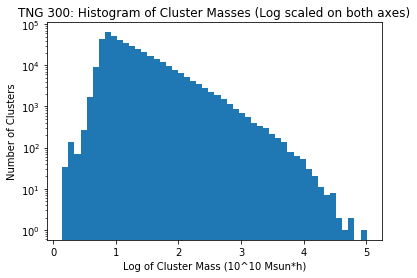

In [19]:
print(halo_grp['count'])
Cluster_masses = halo_grp['GroupMass']
#for i in range((halo_grp['count'])):
    #Cluster_masses.append(halo_grp['GroupMass'][i])
    #print(halo_grp['GroupMass'][i])
#print(Cluster_masses[50])

print(Cluster_masses[:20])
cluster_mass_mask = (Cluster_masses >= (10**3))
print(len((Cluster_masses)[cluster_mass_mask]))
print(((Cluster_masses)[cluster_mass_mask])[:20])
plt.hist((np.log10(Cluster_masses)), bins=50)#bins=[0,100])
#plt.gca().set_xscale("log")
#plt.xscale('log')
plt.title('TNG 300: Histogram of Cluster Masses (Log scaled on both axes)')
plt.xlabel('Log of Cluster Mass (10^10 Msun*h)')
plt.ylabel('Number of Clusters')
plt.yscale('log')

Count of subhalos: 420864
Number of Total groups in Snapshot: 417294
Number of Total subgroups in Snapshot: 420864
Halos with subhalos: 366018
Halos with more than 5 subhalos: 2086


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWa

Subhalos not flagged and with DM mass > 10^11: 38788
Number of halos with mass > 10^13 Msun: 100


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log10


Number of halos with mass > 10^13 Msun: 100


Text(0, 0.5, 'Number of Clusters (Log Scaled)')

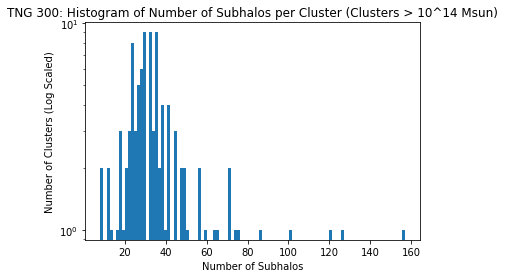

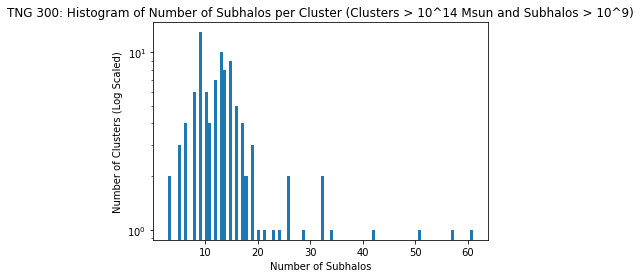

In [21]:
print("Count of subhalos:",subhalo_grp['count'])
#print(subhalo_grp['SubhaloGrNr'][130000:130030])
print("Number of Total groups in Snapshot:", header['Ngroups_Total'])
print("Number of Total subgroups in Snapshot:", header['Nsubgroups_Total'])
grp_first_sub = halo_grp['GroupFirstSub']
mask = [grp_first_sub != -1]
print("Halos with subhalos:",len(grp_first_sub[mask]))
print("Halos with more than 5 subhalos:", len(halo_grp['GroupNsubs'][halo_grp['GroupNsubs']>5]))
#print(halo_grp['GroupNsubs'][100000:100050])
mask_flag = [subhalo_grp['SubhaloFlag'] == True]
subhalomass = np.array(np.log10(np.sum(subhalo_grp['SubhaloMassInRadType'], axis=1)*1e10))
mask_mass = [subhalomass>11]
print("Subhalos not flagged and with DM mass > 10^11:", len((subhalo_grp['SubhaloFlag'])[mask_flag and mask_mass]))
#print((subhalo_grp['SubhaloFlag'])[mask_flag])
mask_halomass = [(halo_grp['GroupMass'])>=(10**4)]
print("Number of halos with mass > 10^13 Msun:", len(halo_grp['GroupMass'][mask_halomass]))

#Histogram of number of subhalos
plt.figure()
x = (halo_grp['GroupNsubs'])[mask_halomass]#[halo_grp['GroupNsubs']>0]
#plt.hist((x), bins=np.logspace(np.log10(0.1),np.log10(1000), 50), log=True)#bins=[0,100])
plt.hist((x), bins=100, log=True)#bins=[0,100])
#plt.gca().set_xscale("log")
#plt.xscale('log')
plt.title('TNG 300: Histogram of Number of Subhalos per Cluster (Clusters > 10^14 Msun)')
plt.xlabel('Number of Subhalos')
plt.ylabel('Number of Clusters (Log Scaled)')

# SUBHALO MASS CUTS AND HISTOGRAM OF SUBHALSO PER CLUSTER
#mask_halomass = ((halo_grp['GroupMass'])>=((10**3)))#&(halo_grp['GroupNsubs']>=10)
Number_of_halos = len(halo_grp['GroupMass'][mask_halomass])
print("Number of halos with mass > 10^13 Msun:", Number_of_halos)
halo_array = np.arange(0,len(halo_grp['GroupMass']))
halo_array_masked = halo_array[mask_halomass]
halo_subhalos = []
for h_i in halo_array_masked:
    #print("\nHalo:", h_i)
    #print("Halo # of Subhalos:", halo_grp['GroupNsubs'][h_i])
    #print("Halo Mass:", halo_grp['GroupMass'][h_i])

    #print("Index of first subhalo:", halo_grp['GroupFirstSub'][h_i])
    iFS = halo_grp['GroupFirstSub'][h_i]
    #print(subhalo_grp['SubhaloGrNr'][iFS]) #635-783 is halo  in subhalo catalog
    N_subhalos = halo_grp['GroupNsubs'][h_i]
    #print("N Subhalos:",N_subhalos)

    # MASKING OF SUBHALO MASS
    subhalomass = np.array(np.log10(np.sum(subhalo_grp['SubhaloMassInRadType'], axis=1)*1e10))
    #subhalomass = np.array(((subhalo_grp['SubhaloStellarPhotometricsMassInRad'])*1e10))
    #mask = np.logical_and((subhalo_grp['SubhaloGrNr'])==h_i , subhalo_grp['SubhaloFlag']==True) #masking so not flagged halos that are in halo
    submass_stellar = np.array(((subhalo_grp['SubhaloMassInRadType'][:,4])*1e10))
    mask = ((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalo_grp['SubhaloFlag']==True)&(submass_stellar > (10**9))#(subhalomass>(10))
    #mask = [subhalo_grp['SubhaloFlag']==True]
    subhalos = len(subhalo_grp['SubhaloGrNr'][mask])
    halo_subhalos.append(subhalos)
halo_subhalos = np.array(halo_subhalos)

plt.figure()
#plt.hist((x), bins=np.logspace(np.log10(0.1),np.log10(1000), 50), log=True)#bins=[0,100])
plt.hist(halo_subhalos, bins=100, log=True)#bins=[0,100])
#plt.gca().set_xscale("log")
#plt.xscale('log')
plt.title('TNG 300: Histogram of Number of Subhalos per Cluster (Clusters > 10^14 Msun and Subhalos > 10^9)')
plt.xlabel('Number of Subhalos')
plt.ylabel('Number of Clusters (Log Scaled)')

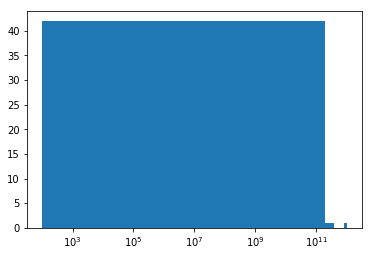

In [17]:

submass_stellar = np.array(((subhalo_grp['SubhaloMassInRadType'][:,4])*1e10))
mask1 = (subhalo_grp['SubhaloGrNr'] == 3)
subhalo_mass_array = submass_stellar[mask1]
plt.figure()
plt.hist((subhalo_mass_array), bins=5, range = (10**2, 10**12))#bins=[0,100])
plt.gca().set_xscale("log")


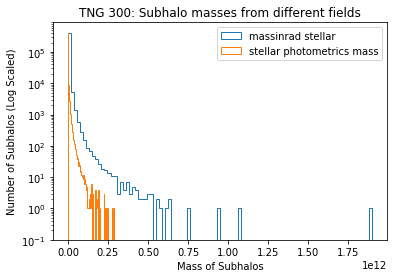

In [55]:
    
submass_stellar = np.array(((subhalo_grp['SubhaloMassInRadType'][:,4])*1e10))
subhalomass = np.array((np.sum(subhalo_grp['SubhaloMassInRadType'], axis=1)*1e10))
submass_photo = np.array(((subhalo_grp['SubhaloStellarPhotometricsMassInRad'])*1e10))
#mask = (subhalo_grp['SubhaloFlag']==True)&(submass_stellar >= (10**9))#(subhalomass>(10))
plt.figure()
plt.hist(submass_stellar,bins=100, log=True, histtype = 'step', label = "massinrad stellar")
plt.legend()
#plt.figure()
#plt.hist(subhalomass,bins=100, log=True, histtype = 'step', label = "massinrad sum")
#plt.legend()
#plt.figure()
plt.hist(submass_photo,bins=100, log=True, histtype = 'step', label = "stellar photometrics mass")
plt.title('TNG 300: Subhalo masses from different fields')
plt.xlabel('Mass of Subhalos')
plt.ylabel('Number of Subhalos (Log Scaled)')
plt.legend()


## Number Density Profiles and Bootstrapped Stacking (Now with covariance matrix too) (For Color-Split, scroll down)

Number of halos with mass > 10^14 Msun: 582
[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  186  187  1

(34,) median: 693938560.0
N Subhalos after second masking: 18
R500c, R200c, R200m: 727.6988 1106.4385 1356.3898
18

Halo: 27
Halo # of Subhalos: 38
Halo Mass: 16891.625
N Subhalos: 38
N Subhalos after masking: 38
(38,) median: 2419203000.0
N Subhalos after second masking: 22
R500c, R200c, R200m: 586.2256 897.78595 1130.7206
22

Halo: 28
Halo # of Subhalos: 30
Halo Mass: 16341.6875
N Subhalos: 30
N Subhalos after masking: 30
(30,) median: 881427840.0
N Subhalos after second masking: 17
R500c, R200c, R200m: 706.0947 1049.2819 1293.4182
16

Halo: 29
Halo # of Subhalos: 44
Halo Mass: 16637.348
N Subhalos: 44
N Subhalos after masking: 44
(44,) median: 2329402400.0
N Subhalos after second masking: 29
R500c, R200c, R200m: 748.20355 1118.5485 1360.627
29

Halo: 30
Halo # of Subhalos: 59
Halo Mass: 16911.275
N Subhalos: 59
N Subhalos after masking: 59
(59,) median: 0.0
N Subhalos after second masking: 27
R500c, R200c, R200m: 533.34296 846.8355 1062.4865
27

Halo: 31
Halo # of Subhalos: 36
Halo 

Halo: 77
Halo # of Subhalos: 33
Halo Mass: 10985.606
N Subhalos: 33
N Subhalos after masking: 33
(33,) median: 0.0
N Subhalos after second masking: 15
R500c, R200c, R200m: 589.23663 937.72253 1168.4182
15

Halo: 78
Halo # of Subhalos: 18
Halo Mass: 11670.839
N Subhalos: 18
N Subhalos after masking: 18
(18,) median: 0.0
N Subhalos after second masking: 8
R500c, R200c, R200m: 678.1182 997.3579 1207.1404
7

Halo: 79
Halo # of Subhalos: 25
Halo Mass: 10739.865
N Subhalos: 25
N Subhalos after masking: 25
(25,) median: 1120881700.0
N Subhalos after second masking: 16
R500c, R200c, R200m: 591.07355 919.2826 1126.7998
16

Halo: 80
Halo # of Subhalos: 25
Halo Mass: 11300.139
N Subhalos: 25
N Subhalos after masking: 25
(25,) median: 0.0
N Subhalos after second masking: 9
R500c, R200c, R200m: 528.07574 832.2012 1056.3674
9

Halo: 81
Halo # of Subhalos: 24
Halo Mass: 10805.29
N Subhalos: 24
N Subhalos after masking: 24
(24,) median: 0.0
N Subhalos after second masking: 11
R500c, R200c, R200m: 587.

Halo: 124
Halo # of Subhalos: 18
Halo Mass: 8911.883
N Subhalos: 18
N Subhalos after masking: 18
(18,) median: 0.0
N Subhalos after second masking: 7
R500c, R200c, R200m: 583.66614 887.79504 1093.7733
6

Halo: 125
Halo # of Subhalos: 23
Halo Mass: 9829.908
N Subhalos: 23
N Subhalos after masking: 22
(22,) median: 562438200.0
N Subhalos after second masking: 12
R500c, R200c, R200m: 605.5645 907.66815 1113.7549
12

Halo: 126
Halo # of Subhalos: 12
Halo Mass: 9014.423
N Subhalos: 12
N Subhalos after masking: 12
(12,) median: 1745108900.0
N Subhalos after second masking: 9
R500c, R200c, R200m: 602.11957 911.2828 1113.3746
9

Halo: 127
Halo # of Subhalos: 8
Halo Mass: 9017.884
N Subhalos: 8
N Subhalos after masking: 8
(8,) median: 9096595000.0
N Subhalos after second masking: 6
R500c, R200c, R200m: 604.8341 912.2006 1116.3215
5

Halo: 128
Halo # of Subhalos: 24
Halo Mass: 8843.698
N Subhalos: 24
N Subhalos after masking: 24
(24,) median: 0.0
N Subhalos after second masking: 6
R500c, R200c, 

Halo: 172
Halo # of Subhalos: 20
Halo Mass: 7451.8325
N Subhalos: 20
N Subhalos after masking: 20
(20,) median: 2395749600.0
N Subhalos after second masking: 12
R500c, R200c, R200m: 474.2445 744.66174 923.9896
12

Halo: 173
Halo # of Subhalos: 18
Halo Mass: 7359.7344
N Subhalos: 18
N Subhalos after masking: 18
(18,) median: 3272361700.0
N Subhalos after second masking: 11
R500c, R200c, R200m: 549.93823 832.3718 1037.2278
11

Halo: 174
Halo # of Subhalos: 17
Halo Mass: 7593.5825
N Subhalos: 17
N Subhalos after masking: 17
(17,) median: 1654258000.0
N Subhalos after second masking: 11
R500c, R200c, R200m: 456.83502 678.3561 835.23206
11

Halo: 175
Halo # of Subhalos: 25
Halo Mass: 7449.8926
N Subhalos: 25
N Subhalos after masking: 25
(25,) median: 3592669200.0
N Subhalos after second masking: 14
R500c, R200c, R200m: 393.85114 618.21075 772.7282
14

Halo: 176
Halo # of Subhalos: 10
Halo Mass: 7552.779
N Subhalos: 10
N Subhalos after masking: 10
(10,) median: 2445683700.0
N Subhalos after 

N Subhalos after second masking: 10
R500c, R200c, R200m: 438.313 699.5661 876.13904
10

Halo: 213
Halo # of Subhalos: 14
Halo Mass: 6582.255
N Subhalos: 14
N Subhalos after masking: 14
(14,) median: 0.0
N Subhalos after second masking: 5
R500c, R200c, R200m: 496.24136 736.1332 909.4577
5

Halo: 214
Halo # of Subhalos: 22
Halo Mass: 6466.6406
N Subhalos: 22
N Subhalos after masking: 21
(21,) median: 546477700.0
N Subhalos after second masking: 11
R500c, R200c, R200m: 444.49042 694.3846 870.3938
11

Halo: 215
Halo # of Subhalos: 23
Halo Mass: 6357.4653
N Subhalos: 23
N Subhalos after masking: 23
(23,) median: 1818054800.0
N Subhalos after second masking: 15
R500c, R200c, R200m: 431.45618 668.11005 820.30304
15

Halo: 216
Halo # of Subhalos: 11
Halo Mass: 6384.977
N Subhalos: 11
N Subhalos after masking: 11
(11,) median: 1942391000.0
N Subhalos after second masking: 8
R500c, R200c, R200m: 530.6011 788.217 974.1349
5

Halo: 217
Halo # of Subhalos: 20
Halo Mass: 6348.0615
N Subhalos: 20
N S

(17,) median: 1929621900.0
N Subhalos after second masking: 10
R500c, R200c, R200m: 418.47906 647.0171 817.40955
10

Halo: 262
Halo # of Subhalos: 22
Halo Mass: 5578.0107
N Subhalos: 22
N Subhalos after masking: 22
(22,) median: 3286619600.0
N Subhalos after second masking: 18
R500c, R200c, R200m: 369.8683 603.2529 766.1913
18

Halo: 263
Halo # of Subhalos: 11
Halo Mass: 5763.803
N Subhalos: 11
N Subhalos after masking: 11
(11,) median: 372567260.0
N Subhalos after second masking: 6
R500c, R200c, R200m: 420.00085 648.87396 807.5048
6

Halo: 264
Halo # of Subhalos: 13
Halo Mass: 5788.215
N Subhalos: 13
N Subhalos after masking: 13
(13,) median: 0.0
N Subhalos after second masking: 6
R500c, R200c, R200m: 443.11368 689.99194 870.5032
6

Halo: 265
Halo # of Subhalos: 8
Halo Mass: 6086.4443
N Subhalos: 8
N Subhalos after masking: 8
(8,) median: 5577476600.0
N Subhalos after second masking: 7
R500c, R200c, R200m: 492.24042 768.12177 946.05865
7

Halo: 266
Halo # of Subhalos: 13
Halo Mass: 56

R500c, R200c, R200m: 450.20624 750.69434 925.48706
6

Halo: 307
Halo # of Subhalos: 9
Halo Mass: 5209.765
N Subhalos: 9
N Subhalos after masking: 9
(9,) median: 695531650.0
N Subhalos after second masking: 5
R500c, R200c, R200m: 510.05307 758.2325 928.79236
5

Halo: 308
Halo # of Subhalos: 18
Halo Mass: 5029.755
N Subhalos: 18
N Subhalos after masking: 18
(18,) median: 1178975200.0
N Subhalos after second masking: 11
R500c, R200c, R200m: 383.3552 636.9421 831.1274
11

Halo: 309
Halo # of Subhalos: 16
Halo Mass: 5150.0586
N Subhalos: 16
N Subhalos after masking: 16
(16,) median: 0.0
N Subhalos after second masking: 6
R500c, R200c, R200m: 481.9215 741.53064 916.8655
6

Halo: 310
Halo # of Subhalos: 11
Halo Mass: 4924.3584
N Subhalos: 11
N Subhalos after masking: 11
(11,) median: 1186560300.0
N Subhalos after second masking: 7
R500c, R200c, R200m: 431.76962 716.2369 898.7412
7

Halo: 311
Halo # of Subhalos: 7
Halo Mass: 5681.021
N Subhalos: 7
N Subhalos after masking: 7
(7,) median: 55059

N Subhalos after masking: 16
(16,) median: 0.0
N Subhalos after second masking: 7
R500c, R200c, R200m: 444.45483 701.4862 886.3141
7

Halo: 351
Halo # of Subhalos: 4
Halo Mass: 4668.88
N Subhalos: 4
N Subhalos after masking: 4
(4,) median: 0.0
N Subhalos after second masking: 1
R500c, R200c, R200m: 469.529 712.1013 890.32104
0

Halo: 352
Halo # of Subhalos: 18
Halo Mass: 4697.3877
N Subhalos: 18
N Subhalos after masking: 18
(18,) median: 376624400.0
N Subhalos after second masking: 10
R500c, R200c, R200m: 484.1557 722.68097 869.77985
10

Halo: 353
Halo # of Subhalos: 13
Halo Mass: 4664.316
N Subhalos: 13
N Subhalos after masking: 13
(13,) median: 807846200.0
N Subhalos after second masking: 7
R500c, R200c, R200m: 447.05215 710.5829 877.54236
7

Halo: 354
Halo # of Subhalos: 5
Halo Mass: 5695.1973
N Subhalos: 5
N Subhalos after masking: 5
(5,) median: 447425860.0
N Subhalos after second masking: 3
R500c, R200c, R200m: 564.23914 791.85675 954.7825
2

Halo: 355
Halo # of Subhalos: 24
Halo

N Subhalos after masking: 4
(4,) median: 661075840.0
N Subhalos after second masking: 2
R500c, R200c, R200m: 500.07156 730.28827 888.4661
2

Halo: 400
Halo # of Subhalos: 18
Halo Mass: 4830.039
N Subhalos: 18
N Subhalos after masking: 18
(18,) median: 0.0
N Subhalos after second masking: 8
R500c, R200c, R200m: 449.35703 678.77356 839.9331
8

Halo: 401
Halo # of Subhalos: 17
Halo Mass: 4683.3867
N Subhalos: 17
N Subhalos after masking: 17
(17,) median: 0.0
N Subhalos after second masking: 8
R500c, R200c, R200m: 394.23062 582.8994 720.3521
8

Halo: 402
Halo # of Subhalos: 12
Halo Mass: 4399.5186
N Subhalos: 12
N Subhalos after masking: 12
(12,) median: 1247735000.0
N Subhalos after second masking: 6
R500c, R200c, R200m: 431.43588 692.61554 864.34357
6

Halo: 403
Halo # of Subhalos: 11
Halo Mass: 4531.069
N Subhalos: 11
N Subhalos after masking: 11
(11,) median: 792919740.0
N Subhalos after second masking: 6
R500c, R200c, R200m: 484.9551 720.36597 876.5368
6

Halo: 404
Halo # of Subhalos:

N Subhalos after second masking: 9
R500c, R200c, R200m: 406.81342 614.10065 773.9452
9

Halo: 440
Halo # of Subhalos: 8
Halo Mass: 4371.213
N Subhalos: 8
N Subhalos after masking: 8
(8,) median: 0.0
N Subhalos after second masking: 3
R500c, R200c, R200m: 463.9989 690.9171 848.8486
2

Halo: 441
Halo # of Subhalos: 9
Halo Mass: 4417.865
N Subhalos: 9
N Subhalos after masking: 9
(9,) median: 3426724900.0
N Subhalos after second masking: 6
R500c, R200c, R200m: 463.06454 689.47125 860.8587
6

Halo: 442
Halo # of Subhalos: 11
Halo Mass: 4264.3965
N Subhalos: 11
N Subhalos after masking: 11
(11,) median: 0.0
N Subhalos after second masking: 5
R500c, R200c, R200m: 459.48596 684.77466 848.1717
4

Halo: 443
Halo # of Subhalos: 12
Halo Mass: 4123.8096
N Subhalos: 12
N Subhalos after masking: 12
(12,) median: 336937400.0
N Subhalos after second masking: 6
R500c, R200c, R200m: 419.7077 656.12524 833.96246
6

Halo: 444
Halo # of Subhalos: 10
Halo Mass: 4236.6147
N Subhalos: 10
N Subhalos after maski

Halo: 483
Halo # of Subhalos: 8
Halo Mass: 3977.7825
N Subhalos: 8
N Subhalos after masking: 8
(8,) median: 13990467000.0
N Subhalos after second masking: 6
R500c, R200c, R200m: 354.48807 644.9835 827.04987
6

Halo: 484
Halo # of Subhalos: 13
Halo Mass: 3939.158
N Subhalos: 13
N Subhalos after masking: 13
(13,) median: 1205113200.0
N Subhalos after second masking: 8
R500c, R200c, R200m: 390.1437 612.6939 767.7736
8

Halo: 485
Halo # of Subhalos: 11
Halo Mass: 4067.8628
N Subhalos: 11
N Subhalos after masking: 11
(11,) median: 432983460.0
N Subhalos after second masking: 6
R500c, R200c, R200m: 435.87778 663.28394 816.85956
6

Halo: 486
Halo # of Subhalos: 12
Halo Mass: 3648.7104
N Subhalos: 12
N Subhalos after masking: 12
(12,) median: 768879600.0
N Subhalos after second masking: 9
R500c, R200c, R200m: 321.1693 634.1899 808.7199
9

Halo: 487
Halo # of Subhalos: 6
Halo Mass: 4001.7224
N Subhalos: 6
N Subhalos after masking: 6
(6,) median: 0.0
N Subhalos after second masking: 2
R500c, R20

Halo: 524
Halo # of Subhalos: 11
Halo Mass: 3833.3638
N Subhalos: 11
N Subhalos after masking: 10
(10,) median: 1777869800.0
N Subhalos after second masking: 6
R500c, R200c, R200m: 363.42435 589.48676 742.1614
6

Halo: 525
Halo # of Subhalos: 11
Halo Mass: 3571.4626
N Subhalos: 11
N Subhalos after masking: 11
(11,) median: 0.0
N Subhalos after second masking: 4
R500c, R200c, R200m: 371.6237 615.07 773.8942
4

Halo: 526
Halo # of Subhalos: 13
Halo Mass: 3594.0078
N Subhalos: 13
N Subhalos after masking: 13
(13,) median: 1343774800.0
N Subhalos after second masking: 7
R500c, R200c, R200m: 382.91953 609.62964 760.67957
7

Halo: 527
Halo # of Subhalos: 11
Halo Mass: 3681.1477
N Subhalos: 11
N Subhalos after masking: 11
(11,) median: 2206993400.0
N Subhalos after second masking: 7
R500c, R200c, R200m: 435.19952 661.3745 808.2861
7

Halo: 528
Halo # of Subhalos: 10
Halo Mass: 3718.4617
N Subhalos: 10
N Subhalos after masking: 10
(10,) median: 6136708000.0
N Subhalos after second masking: 8
R

(9,) median: 5392158000.0
N Subhalos after second masking: 5
R500c, R200c, R200m: 411.3217 648.44 807.5742
5

Halo: 576
Halo # of Subhalos: 6
Halo Mass: 3806.9404
N Subhalos: 6
N Subhalos after masking: 6
(6,) median: 7081562000.0
N Subhalos after second masking: 4
R500c, R200c, R200m: 418.96344 613.27423 764.14465
4

Halo: 580
Halo # of Subhalos: 8
Halo Mass: 3579.13
N Subhalos: 8
N Subhalos after masking: 7
(7,) median: 0.0
N Subhalos after second masking: 3
R500c, R200c, R200m: 448.63495 668.84894 811.93713
3

Halo: 581
Halo # of Subhalos: 10
Halo Mass: 3566.0625
N Subhalos: 10
N Subhalos after masking: 10
(10,) median: 1031691000.0
N Subhalos after second masking: 6
R500c, R200c, R200m: 418.60864 652.6447 805.65466
6

Halo: 584
Halo # of Subhalos: 8
Halo Mass: 3601.978
N Subhalos: 8
N Subhalos after masking: 8
(8,) median: 5689641000.0
N Subhalos after second masking: 5
R500c, R200c, R200m: 417.77185 642.9283 802.30194
5

Halo: 588
Halo # of Subhalos: 8
Halo Mass: 3546.299
N Subhal

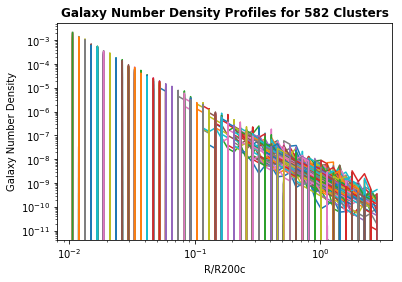

(300, 582)
shape of resampled array: (300, 50)
shape of Yi_avg (50,)
shape of Yi_avg_array (300, 50)
shape of covariance matrix (50, 50)
[[ 1.04224238e-10 -8.39568519e-12  5.96319057e-13 ...  2.67633983e-18
   2.04521979e-18  1.61390690e-18]
 [-8.39568519e-12  5.56220586e-11 -8.70287865e-13 ... -1.50783745e-18
  -2.70014961e-18  7.83380564e-19]
 [ 5.96319057e-13 -8.70287865e-13  1.47853967e-11 ... -1.60980905e-18
  -4.89284323e-19 -8.06135863e-19]
 ...
 [ 2.67633983e-18 -1.50783745e-18 -1.60980905e-18 ...  4.02286190e-23
   8.95801804e-24  2.82099516e-24]
 [ 2.04521979e-18 -2.70014961e-18 -4.89284323e-19 ...  8.95801804e-24
   8.50204529e-24  1.40971004e-24]
 [ 1.61390690e-18  7.83380564e-19 -8.06135863e-19 ...  2.82099516e-24
   1.40971004e-24  3.32758966e-24]]
ND_err: [1.02090273e-05 7.45801975e-06 3.84517838e-06 3.38379730e-06
 3.21861663e-06 1.88800703e-06 1.40674083e-06 9.99645893e-07
 6.96928889e-07 4.78348741e-07 3.73061844e-07 2.16906482e-07
 1.62935283e-07 1.19819373e-07 9.072

Text(0.5, 1.0, 'Bootstrapped (Cov) Stacked Profile of 582 Clusters \n (50 Bins)(Cluster > 5*10^13, Subhalo Total Stellar Mass > 10^9)')

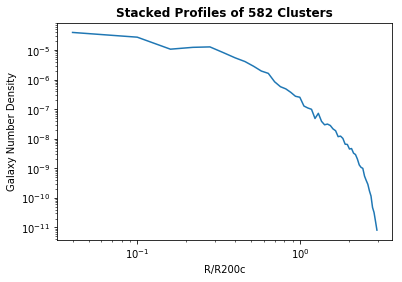

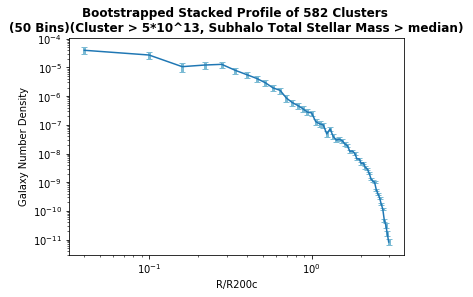

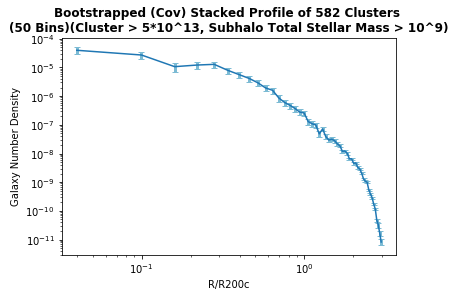

In [51]:
plt.rcParams['figure.facecolor'] = 'w'

mask_halomass = ((halo_grp['GroupMass']/.704)>=((5*(10**3))))#&(halo_grp['GroupNsubs']>=10)
Number_of_halos = len(halo_grp['GroupMass'][mask_halomass])
print("Number of halos with mass > 10^14 Msun:", Number_of_halos)

halo_array = np.arange(0,len(halo_grp['GroupMass']))
halo_array_masked = halo_array[mask_halomass]
print(halo_array_masked)

NDensity_list = []
ND_boot = []

for h_i in halo_array_masked:
    print("\nHalo:", h_i)
    print("Halo # of Subhalos:", halo_grp['GroupNsubs'][h_i])
    print("Halo Mass:", halo_grp['GroupMass'][h_i])
    #print("Index of first subhalo:", halo_grp['GroupFirstSub'][h_i])
    #iFS = halo_grp['GroupFirstSub'][h_i]
    N_subhalos = halo_grp['GroupNsubs'][h_i]
    print("N Subhalos:",N_subhalos)

    # MASKING OF SUBHALO MASS
    #subhalomass = np.array((np.sum(subhalo_grp['SubhaloMassInRadType'], axis=1)*1e10))
    #subhalomass = (subhalo_grp['SubhaloMass'])*1e10
    #subhalomass = np.array(((subhalo_grp['SubhaloStellarPhotometricsMassInRad'])*1e10))
    #mask = np.logical_and((subhalo_grp['SubhaloGrNr'])==h_i , subhalo_grp['SubhaloFlag']==True) #masking so not flagged halos that are in halo
    #subhalomass = np.array(((subhalo_grp['SubhaloMassInRadType'][:,4])*1e10))
    subhalomass = np.array(((subhalo_grp['SubhaloMassType'][:,4])*(1e10)/0.704))
    mask = ((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalo_grp['SubhaloFlag']==True)#&(submass_stellar >= (10**9))#(subhalomass>(10))
    print("N Subhalos after masking:", len(subhalo_grp['SubhaloGrNr'][mask]))
    median = np.median(subhalomass[mask])
    print(np.shape(subhalomass[mask]), "median:", median)
    #print(subhalomass[mask])
    mask1 = ((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalo_grp['SubhaloFlag']==True)&(subhalomass > 10^9)#median
    print("N Subhalos after second masking:", len(subhalo_grp['SubhaloGrNr'][mask1]))
    #print(subhalo_grp['SubhaloGrNr'][mask1])
    
    # COORDINATES
    CM_coords = subhalo_grp['SubhaloCM'][mask1]
    CM_halo = halo_grp['GroupCM'][h_i]


    # MAKING PROFILE
    r_subhalo = np.sqrt((CM_coords[:,0] - CM_halo[0])**2 + (CM_coords[:,1] - CM_halo[1])**2 + (CM_coords[:,2] - CM_halo[2])**2) # in ckpc/h
    

    R500c = halo_grp['Group_R_Crit500'][h_i]
    R200c = halo_grp['Group_R_Crit200'][h_i]
    R200m = halo_grp['Group_R_Mean200'][h_i]
    M200m = halo_grp['Group_M_Mean200'][h_i]
    print("R500c, R200c, R200m:",R500c, R200c, R200m)
    RScale = R200c
    
    bins = 50
    bin_edge = np.logspace(np.log10(.01*RScale), np.log10(3*RScale), num=bins+1) #3.5 earlier
    bin_min = bin_edge[:-1]
    bin_max = bin_edge[1:]

    
    NDensity = []
    galaxies = []
    for i in range(0,bins):
        mask_sep = (r_subhalo >=bin_min[i])*(r_subhalo < bin_max[i])
        r_masked = r_subhalo[mask_sep]
        number = len(r_masked)
        delta_r = bin_max[i] - bin_min[i]
        volume = (4/3)*np.pi*(((bin_max[i])**3) - ((bin_min[i])**3))
        density = number/volume
        r = (bin_min[i] + bin_max[i])/2
        galaxies.append(number)
        NDensity.append(density)
        #print(r, number, density)
    print(sum(galaxies))
    r_shell = (bin_min + bin_max)/2
    r_stack = r_shell/RScale
    #print(r_stack)
    #bin_divided = np.linspace(.01,3,num=bins+1)
    #bin_stack = (bin_divided[1:]+bin_divided[:-1])/2
    #print(bin_stack)
    NDensity_list.append(NDensity) #/M200m
    #plt.figure()
    plt.plot(r_stack, NDensity, '-') #/M200m
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('R/R200c')
    plt.ylabel('Galaxy Number Density') #/M200m
    plt.title('Galaxy Number Density Profiles for %s Clusters' %(Number_of_halos), fontweight = 'bold')

plt.show()

NDensity_stack = np.mean(NDensity_list, axis=0)
# BOOTSTRAPPING
halo_array2 = np.arange(0,Number_of_halos)
halo_boot = astats.bootstrap(halo_array2, bootnum=300, samples=None)
print(np.shape(halo_boot))
resampled_list = []
for b in range(0,300):
    mask_b = (np.array(halo_boot[b].astype(int)))
    #print(type(mask_b))
    #print(mask_b)
    #mask_b_list = []
    #for bi in mask_b:
        #mask_b_list.append(bi)
    #mask_b_array = np.array(mask_b_list)
            
    resampled_profile = np.mean((np.array(NDensity_list))[mask_b], axis=0)
    resampled_list.append(resampled_profile)
resampled_array = np.array(resampled_list)
print("shape of resampled array:", np.shape(resampled_array))
assert(len(resampled_array)==len(halo_boot))
ND_boot_stack = np.mean(resampled_array, axis=0)
ND_err = np.std(resampled_array, axis=0, ddof=1)
#ND_err = np.sqrt((300/299)*(np.std(resampled_array, axis=0, ))**2)

#print("length of NDerr", len(ND_err))

Yi = resampled_array
Nb = 300
R = bins
Yi_avg = np.mean(Yi, axis=0)
print("shape of Yi_avg", np.shape(Yi_avg))
Yi_avg_array = np.tile(Yi_avg, (Nb,1))
print("shape of Yi_avg_array", np.shape(Yi_avg_array))
minus_array = Yi - Yi_avg_array

Yi_cov = np.zeros((R,R))
for i in range(R):
    for j in range(R):
        Yi_cov[i,j] = (1./(Nb-1.))*(np.sum(minus_array[:,i]*minus_array[:,j]))
print("shape of covariance matrix", np.shape(Yi_cov))
print(Yi_cov)
boot_err = np.sqrt(np.diag(Yi_cov))
print("ND_err:", ND_err)
print("boot_err:",boot_err)


#PLOTTING STACK
bin_divided = np.linspace(.01,3,num=bins+1)
bin_stack = (bin_divided[1:]+bin_divided[:-1])/2

plt.figure()
plt.plot(bin_stack, NDensity_stack, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')#  (scaled by M200m)
plt.title('Stacked Profiles of %s Clusters' %(Number_of_halos), fontweight = 'bold', wrap=True)

plt.figure()
plt.errorbar(bin_stack, ND_boot_stack, yerr = ND_err, ecolor = '#7CBBD4', elinewidth = 3, capsize=3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('Bootstrapped Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13, Subhalo Total Stellar Mass > median)' %(Number_of_halos, bins), fontweight = 'bold', wrap=True)
#plt.ylim(1e-12, 1e-6)

plt.figure()
plt.errorbar(bin_stack, Yi_avg, yerr = boot_err, ecolor = '#7CBBD4', elinewidth = 3, capsize=3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('Bootstrapped (Cov) Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13, Subhalo Total Stellar Mass > 10^9)' %(Number_of_halos, bins), fontweight = 'bold', wrap=True)
#plt.ylim(1e-12, 1e-6)

## Number Density with Jackknife Covariance Matrix

Number of halos with mass > 10^14 Msun: 582
[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  186  187  1

N Subhalos after masking: 24
(24,) median: 6300588000.0
[1.3455027e+12 2.7114689e+11 1.4169006e+11 1.5165313e+09 4.3331011e+10
 1.4391729e+09 4.4821320e+10 2.7030929e+10 1.0203734e+10 5.5165798e+09
 1.5726810e+09 2.5499531e+10 7.0845957e+09 5.0635412e+09 2.0552391e+10
 9.3415393e+09 2.7700483e+09 3.2187899e+09 1.3285535e+09 2.8043730e+09
 1.3715774e+10 1.5649994e+09 1.9204264e+09 1.2592140e+09]
N Subhalos after second masking: 24
R500c, R200c, R200m: 923.94794 1366.9922 1668.1692
23

Halo: 8
Halo # of Subhalos: 49
Halo Mass: 30054.008
N Subhalos: 49
N Subhalos after masking: 20
(20,) median: 9236306000.0
[1.6578022e+12 1.0914723e+11 5.0011013e+10 1.1767773e+11 1.6369349e+10
 3.8914781e+10 8.0879510e+10 1.4956962e+10 1.1703335e+10 1.6616233e+10
 1.4511643e+09 6.3275341e+09 1.6160275e+09 1.8149809e+09 5.8440637e+09
 6.7692764e+09 2.7748749e+09 1.1330129e+09 1.9312212e+09 5.5739894e+09]
N Subhalos after second masking: 20
R500c, R200c, R200m: 844.5012 1329.4492 1652.6981
19

Halo: 9
Halo 


Halo: 25
Halo # of Subhalos: 36
Halo Mass: 17734.672
N Subhalos: 36
N Subhalos after masking: 16
(16,) median: 14481097000.0
[8.0944680e+11 8.9915785e+10 9.8869797e+10 6.4800121e+10 1.1978586e+10
 2.6099651e+10 7.8261756e+10 8.0317338e+09 6.1200200e+10 1.6983606e+10
 5.7188813e+09 5.0736374e+09 5.8757550e+09 9.7461381e+09 4.5083264e+09
 1.3804146e+09]
N Subhalos after second masking: 16
R500c, R200c, R200m: 791.61774 1156.8398 1399.4427
16

Halo: 26
Halo # of Subhalos: 34
Halo Mass: 16970.996
N Subhalos: 34
N Subhalos after masking: 16
(16,) median: 12072282000.0
[5.78972615e+11 1.90379131e+11 4.42565878e+10 5.05888195e+10
 2.94546350e+10 2.09511363e+10 1.85822433e+10 4.69342290e+10
 3.43757568e+09 1.03154355e+09 2.96225690e+09 3.06993536e+09
 2.43805030e+09 5.56232090e+09 1.32694413e+09 1.08442931e+09]
N Subhalos after second masking: 16
R500c, R200c, R200m: 727.6988 1106.4385 1356.3898
16

Halo: 27
Halo # of Subhalos: 38
Halo Mass: 16891.625
N Subhalos: 38
N Subhalos after masking: 

Halo: 47
Halo # of Subhalos: 19
Halo Mass: 18321.424
N Subhalos: 19
N Subhalos after masking: 11
(11,) median: 20420727000.0
[4.8659104e+11 3.8055600e+10 9.8924995e+10 1.9847176e+10 2.2104203e+10
 1.9072799e+09 6.6415419e+10 2.0420727e+10 6.6206531e+09 2.0267748e+09
 3.7782797e+09]
N Subhalos after second masking: 11
R500c, R200c, R200m: 807.1035 1155.083 1389.3386
11

Halo: 48
Halo # of Subhalos: 34
Halo Mass: 13575.574
N Subhalos: 34
N Subhalos after masking: 18
(18,) median: 13483414000.0
[5.4739245e+11 1.3119955e+11 1.1691708e+11 6.5929810e+10 8.6510862e+10
 9.2630190e+09 2.5805074e+10 7.3941647e+10 2.4084393e+09 5.6922158e+09
 5.6017700e+09 5.7543665e+09 5.4463391e+09 1.7703807e+10 1.8717549e+10
 7.0156508e+09 1.1516221e+09 2.2179323e+09]
N Subhalos after second masking: 18
R500c, R200c, R200m: 615.05975 977.1241 1216.804
18

Halo: 49
Halo # of Subhalos: 27
Halo Mass: 13570.27
N Subhalos: 27
N Subhalos after masking: 7
(7,) median: 12234003000.0
[4.1706635e+11 1.0200441e+11 5.7225

R500c, R200c, R200m: 480.36743 777.8952 992.7174
16

Halo: 71
Halo # of Subhalos: 32
Halo Mass: 11086.508
N Subhalos: 32
N Subhalos after masking: 16
(16,) median: 33014321000.0
[4.4275512e+11 8.3184034e+10 3.7858472e+10 1.7043380e+10 3.9767855e+10
 1.0059169e+10 1.7576737e+11 6.9830320e+10 6.9241127e+10 4.4070134e+10
 4.0794363e+09 2.8170168e+10 5.5072015e+09 1.0732386e+10 8.1531075e+09
 5.6245663e+09]
N Subhalos after second masking: 16
R500c, R200c, R200m: 585.8134 901.9585 1129.4957
16

Halo: 72
Halo # of Subhalos: 13
Halo Mass: 11323.668
N Subhalos: 13
N Subhalos after masking: 6
(6,) median: 59014940000.0
[9.3353522e+11 3.0301618e+10 1.3695736e+11 8.7728259e+10 1.9431768e+10
 2.0079780e+09]
N Subhalos after second masking: 6
R500c, R200c, R200m: 662.71814 976.4913 1192.3127
6

Halo: 73
Halo # of Subhalos: 24
Halo Mass: 11493.97
N Subhalos: 24
N Subhalos after masking: 10
(10,) median: 67861045000.0
[4.9126785e+11 6.7505734e+10 7.5921097e+10 6.8216357e+10 1.0705547e+10
 7.6717040e

R500c, R200c, R200m: 346.42346 678.9845 890.86194
13

Halo: 102
Halo # of Subhalos: 27
Halo Mass: 9794.337
N Subhalos: 27
N Subhalos after masking: 9
(9,) median: 51540260000.0
[2.8031028e+11 5.1540259e+10 5.2037579e+10 9.0635756e+10 7.3752125e+10
 2.6008251e+09 1.1299402e+09 1.3190196e+10 7.8821192e+09]
N Subhalos after second masking: 9
R500c, R200c, R200m: 621.5459 923.93677 1126.137
9

Halo: 103
Halo # of Subhalos: 34
Halo Mass: 9814.294
N Subhalos: 34
N Subhalos after masking: 14
(14,) median: 29924311000.0
[2.38800945e+11 1.23610006e+11 6.39467971e+10 1.11496143e+11
 4.50575892e+10 3.14470277e+10 2.84015944e+10 5.54400563e+09
 3.67764644e+10 2.70323548e+10 2.43195822e+10 9.87155866e+09
 1.70309197e+09 2.05793856e+09]
N Subhalos after second masking: 14
R500c, R200c, R200m: 559.7761 878.2034 1093.041
14

Halo: 104
Halo # of Subhalos: 24
Halo Mass: 9616.27
N Subhalos: 24
N Subhalos after masking: 12
(12,) median: 18361768000.0
[2.2198333e+11 7.5130470e+10 9.8764153e+10 9.9159097e+1

Halo: 134
Halo # of Subhalos: 20
Halo Mass: 8360.018
N Subhalos: 20
N Subhalos after masking: 8
(8,) median: 16691852000.0
[1.7808541e+11 4.0002597e+10 3.5115475e+10 1.9803658e+10 1.3580046e+10
 9.2722493e+09 1.9352579e+09 2.3428132e+09]
N Subhalos after second masking: 8
R500c, R200c, R200m: 508.92337 800.0646 1036.5975
8

Halo: 135
Halo # of Subhalos: 11
Halo Mass: 8492.356
N Subhalos: 11
N Subhalos after masking: 7
(7,) median: 10092629000.0
[5.3100855e+11 1.5471744e+10 1.2177486e+10 6.4352799e+09 2.3368758e+09
 1.0092629e+10 6.5302170e+09]
N Subhalos after second masking: 7
R500c, R200c, R200m: 621.81006 904.0077 1105.2618
6

Halo: 136
Halo # of Subhalos: 20
Halo Mass: 8745.117
N Subhalos: 20
N Subhalos after masking: 6
(6,) median: 43247840000.0
[4.9067498e+11 6.7754480e+10 3.8383972e+10 4.8111710e+10 2.0700019e+10
 1.0572560e+10]
N Subhalos after second masking: 6
R500c, R200c, R200m: 599.6978 900.26544 1099.2009
5

Halo: 137
Halo # of Subhalos: 34
Halo Mass: 8580.825
N Subhalos:


Halo: 165
Halo # of Subhalos: 17
Halo Mass: 7372.473
N Subhalos: 17
N Subhalos after masking: 7
(7,) median: 81811910000.0
[2.98397368e+11 9.62918564e+10 9.77876910e+10 8.18119066e+10
 1.04390854e+09 5.23731661e+09 6.60125542e+09]
N Subhalos after second masking: 7
R500c, R200c, R200m: 531.21265 835.59894 1039.4492
6

Halo: 166
Halo # of Subhalos: 10
Halo Mass: 8062.1963
N Subhalos: 10
N Subhalos after masking: 2
(2,) median: 240157360000.0
[4.5562213e+11 2.4692589e+10]
N Subhalos after second masking: 2
R500c, R200c, R200m: 578.00183 857.2174 1044.4011
2

Halo: 167
Halo # of Subhalos: 18
Halo Mass: 7794.7856
N Subhalos: 18
N Subhalos after masking: 7
(7,) median: 59825885000.0
[2.8146608e+11 1.2278360e+11 5.1408490e+10 5.9825885e+10 3.6468349e+09
 7.2764473e+10 1.3240579e+10]
N Subhalos after second masking: 7
R500c, R200c, R200m: 473.0787 710.6278 877.8456
6

Halo: 168
Halo # of Subhalos: 19
Halo Mass: 7341.851
N Subhalos: 19
N Subhalos after masking: 6
(6,) median: 12941169000.0
[6

N Subhalos after masking: 6
(6,) median: 14449315000.0
[2.5091475e+11 2.8629550e+09 1.3997451e+10 2.8911413e+10 2.9789189e+09
 1.4901178e+10]
N Subhalos after second masking: 6
R500c, R200c, R200m: 556.06287 833.6749 1013.96027
6

Halo: 198
Halo # of Subhalos: 14
Halo Mass: 7626.3076
N Subhalos: 14
N Subhalos after masking: 8
(8,) median: 7216302000.0
[4.0082296e+11 1.0006973e+10 1.5393774e+09 9.0872535e+09 5.3792732e+09
 2.3570947e+09 9.0533315e+09 1.8138483e+09]
N Subhalos after second masking: 8
R500c, R200c, R200m: 594.00653 855.5626 1038.6787
8

Halo: 199
Halo # of Subhalos: 18
Halo Mass: 6870.246
N Subhalos: 18
N Subhalos after masking: 12
(12,) median: 21024092000.0
[1.7198267e+11 1.4138047e+11 2.9322023e+10 4.4460327e+10 3.0784774e+10
 6.6101325e+09 3.4437636e+10 1.4746324e+09 7.5029617e+09 1.2726161e+10
 4.0906153e+09 6.1413627e+09]
N Subhalos after second masking: 12
R500c, R200c, R200m: 469.80402 703.96655 908.8722
12

Halo: 200
Halo # of Subhalos: 13
Halo Mass: 6736.9272
N 

Halo: 228
Halo # of Subhalos: 11
Halo Mass: 6153.34
N Subhalos: 11
N Subhalos after masking: 8
(8,) median: 47061475000.0
[2.7211902e+11 2.5051064e+11 6.6910675e+10 5.0883514e+10 1.0544749e+10
 7.0898908e+09 7.6975841e+09 4.3239440e+10]
N Subhalos after second masking: 8
R500c, R200c, R200m: 455.2103 698.0332 933.58154
8

Halo: 229
Halo # of Subhalos: 13
Halo Mass: 6258.1113
N Subhalos: 13
N Subhalos after masking: 7
(7,) median: 21710830000.0
[2.7461239e+11 2.5327205e+11 3.5420656e+10 2.1710830e+10 1.6544742e+09
 1.5646024e+09 6.3843907e+09]
N Subhalos after second masking: 7
R500c, R200c, R200m: 478.7064 739.74774 937.7272
7

Halo: 230
Halo # of Subhalos: 13
Halo Mass: 6278.8037
N Subhalos: 13
N Subhalos after masking: 4
(4,) median: 55020175000.0
[3.3444446e+11 5.6124342e+10 4.5450189e+09 5.3916008e+10]
N Subhalos after second masking: 4
R500c, R200c, R200m: 539.9236 799.3882 981.725
3

Halo: 231
Halo # of Subhalos: 14
Halo Mass: 5888.6294
N Subhalos: 14
N Subhalos after masking: 6


R500c, R200c, R200m: 476.6871 694.80316 842.80994
5

Halo: 261
Halo # of Subhalos: 17
Halo Mass: 5657.104
N Subhalos: 17
N Subhalos after masking: 10
(10,) median: 3084783600.0
[1.7522852e+11 9.4012219e+10 1.9296219e+09 2.7206008e+09 2.1671107e+09
 2.1695657e+09 1.9422417e+10 1.8252493e+10 3.4489661e+09 1.3223069e+09]
N Subhalos after second masking: 10
R500c, R200c, R200m: 418.47906 647.0171 817.40955
10

Halo: 262
Halo # of Subhalos: 22
Halo Mass: 5578.0107
N Subhalos: 22
N Subhalos after masking: 16
(16,) median: 7860102700.0
[7.70263040e+10 3.24606464e+10 1.92844145e+10 1.04505942e+11
 6.83248640e+09 4.57341440e+09 8.88771891e+09 1.96299469e+10
 3.03720883e+09 1.73684613e+10 1.03241165e+09 1.01031035e+10
 2.11091584e+09 2.05479398e+09 3.53603046e+09 1.91997965e+09]
N Subhalos after second masking: 16
R500c, R200c, R200m: 369.8683 603.2529 766.1913
16

Halo: 263
Halo # of Subhalos: 11
Halo Mass: 5763.803
N Subhalos: 11
N Subhalos after masking: 5
(5,) median: 70253460000.0
[1.823064

Halo: 293
Halo # of Subhalos: 10
Halo Mass: 5341.2925
N Subhalos: 10
N Subhalos after masking: 7
(7,) median: 17483774000.0
[1.9712873e+11 3.3200785e+10 1.7483774e+10 4.8796987e+10 8.4492380e+09
 4.0281789e+09 1.2767356e+10]
N Subhalos after second masking: 7
R500c, R200c, R200m: 477.8327 725.58795 900.6554
7

Halo: 294
Halo # of Subhalos: 16
Halo Mass: 5328.8022
N Subhalos: 16
N Subhalos after masking: 9
(9,) median: 12402906000.0
[1.4124712e+11 2.6793816e+10 4.2815575e+09 2.4778994e+10 3.3475654e+10
 1.2402906e+10 8.9214956e+09 3.5977731e+09 5.0149222e+09]
N Subhalos after second masking: 9
R500c, R200c, R200m: 484.91217 754.7747 922.0293
9

Halo: 295
Halo # of Subhalos: 14
Halo Mass: 5239.7075
N Subhalos: 14
N Subhalos after masking: 8
(8,) median: 13033617000.0
[2.0092987e+11 1.1847769e+10 1.3034209e+10 3.7557649e+10 1.4087154e+10
 1.3033027e+10 2.9429235e+09 2.5440353e+09]
N Subhalos after second masking: 8
R500c, R200c, R200m: 480.2165 740.7383 914.85596
8

Halo: 296
Halo # of Su

Halo: 324
Halo # of Subhalos: 8
Halo Mass: 5068.7905
N Subhalos: 8
N Subhalos after masking: 3
(3,) median: 10984335000.0
[1.8999561e+11 2.7492088e+09 1.0984335e+10]
N Subhalos after second masking: 3
R500c, R200c, R200m: 483.45093 730.88666 896.8632
3

Halo: 325
Halo # of Subhalos: 17
Halo Mass: 5053.8115
N Subhalos: 17
N Subhalos after masking: 9
(9,) median: 22204432000.0
[1.57718217e+11 7.76287683e+10 7.16462244e+10 2.71214776e+10
 2.07720256e+09 2.22044324e+10 7.48382208e+09 1.01896474e+09
 4.00424499e+09]
N Subhalos after second masking: 9
R500c, R200c, R200m: 466.15622 731.9276 901.0436
9

Halo: 326
Halo # of Subhalos: 14
Halo Mass: 5066.735
N Subhalos: 14
N Subhalos after masking: 6
(6,) median: 18912813000.0
[2.2963675e+11 3.6609274e+10 6.2210367e+10 1.2163517e+09 1.1924780e+09
 1.1776412e+09]
N Subhalos after second masking: 6
R500c, R200c, R200m: 508.86823 751.83514 913.8773
6

Halo: 327
Halo # of Subhalos: 10
Halo Mass: 5023.228
N Subhalos: 10
N Subhalos after masking: 8
(8

N Subhalos after masking: 4
(4,) median: 31816507000.0
[3.1659639e+11 4.9784959e+10 1.3848056e+10 2.4467192e+09]
N Subhalos after second masking: 4
R500c, R200c, R200m: 502.83377 742.9772 909.8871
3

Halo: 357
Halo # of Subhalos: 9
Halo Mass: 4752.371
N Subhalos: 9
N Subhalos after masking: 6
(6,) median: 15859714000.0
[3.8726956e+11 6.2201328e+10 9.8980035e+09 2.1821424e+10 1.1222528e+09
 4.1182528e+09]
N Subhalos after second masking: 6
R500c, R200c, R200m: 436.2835 716.91425 888.3157
6

Halo: 358
Halo # of Subhalos: 9
Halo Mass: 4853.0605
N Subhalos: 9
N Subhalos after masking: 6
(6,) median: 16355308000.0
[2.2256722e+11 4.6927734e+09 2.8089958e+10 2.5741775e+09 1.9020298e+10
 1.3690317e+10]
N Subhalos after second masking: 6
R500c, R200c, R200m: 471.46878 730.25183 898.456
6

Halo: 359
Halo # of Subhalos: 21
Halo Mass: 4772.9775
N Subhalos: 21
N Subhalos after masking: 10
(10,) median: 18726597000.0
[1.0122022e+11 5.0220229e+10 2.5203180e+10 5.4012641e+10 4.3702362e+10
 1.2250013e+

N Subhalos after masking: 8
(8,) median: 12716044000.0
[6.2871052e+10 1.0832929e+11 1.1263598e+10 1.6835833e+10 4.9867423e+09
 3.5120113e+09 1.4168492e+10 2.2530412e+09]
N Subhalos after second masking: 8
R500c, R200c, R200m: 252.11566 540.74835 800.93695
8

Halo: 389
Halo # of Subhalos: 17
Halo Mass: 4466.8545
N Subhalos: 17
N Subhalos after masking: 10
(10,) median: 19615513000.0
[1.7227463e+11 7.7133644e+10 8.9376080e+10 4.1483694e+10 2.7152031e+09
 2.3006306e+10 1.2204377e+10 1.6224720e+10 9.3105766e+09 5.8491290e+09]
N Subhalos after second masking: 10
R500c, R200c, R200m: 325.6123 489.23074 614.92957
9

Halo: 390
Halo # of Subhalos: 5
Halo Mass: 4974.0503
N Subhalos: 5
N Subhalos after masking: 3
(3,) median: 6822157300.0
[3.3810036e+11 6.8221573e+09 2.3384965e+09]
N Subhalos after second masking: 3
R500c, R200c, R200m: 514.78156 740.8156 902.247
3

Halo: 391
Halo # of Subhalos: 13
Halo Mass: 4870.1924
N Subhalos: 13
N Subhalos after masking: 4
(4,) median: 4471340000.0
[3.299360

[1.7629209e+11 3.0378080e+10 4.8934224e+10 3.1809503e+09]
N Subhalos after second masking: 4
R500c, R200c, R200m: 419.41977 653.2316 840.5386
4

Halo: 420
Halo # of Subhalos: 16
Halo Mass: 4439.0967
N Subhalos: 16
N Subhalos after masking: 6
(6,) median: 46011790000.0
[1.0383683e+11 7.9439143e+10 6.1556330e+10 3.0467250e+10 1.6461200e+10
 1.7163507e+09]
N Subhalos after second masking: 6
R500c, R200c, R200m: 429.6152 675.8646 840.67236
6

Halo: 421
Halo # of Subhalos: 19
Halo Mass: 4238.4385
N Subhalos: 19
N Subhalos after masking: 6
(6,) median: 18999340000.0
[9.0603160e+10 2.2045114e+10 8.5236146e+10 4.6668001e+09 1.5953563e+10
 1.1939942e+09]
N Subhalos after second masking: 6
R500c, R200c, R200m: 397.00656 634.58234 818.62085
6

Halo: 422
Halo # of Subhalos: 14
Halo Mass: 4272.558
N Subhalos: 14
N Subhalos after masking: 7
(7,) median: 28200516000.0
[8.0900948e+10 9.2509381e+10 2.8200516e+10 2.1599072e+10 6.9890187e+10
 2.6469906e+10 8.4914058e+09]
N Subhalos after second masking: 

5

Halo: 451
Halo # of Subhalos: 16
Halo Mass: 4299.3887
N Subhalos: 16
N Subhalos after masking: 5
(5,) median: 2170354400.0
[3.2050322e+11 2.1703544e+09 1.8420425e+09 1.1527484e+09 4.9131730e+09]
N Subhalos after second masking: 5
R500c, R200c, R200m: 455.65347 687.5815 851.73724
4

Halo: 452
Halo # of Subhalos: 16
Halo Mass: 4226.2085
N Subhalos: 16
N Subhalos after masking: 5
(5,) median: 24460075000.0
[7.5233108e+10 5.9451458e+10 2.4460075e+10 1.4550106e+10 1.2758998e+10]
N Subhalos after second masking: 5
R500c, R200c, R200m: 389.98563 588.7451 769.4427
5

Halo: 453
Halo # of Subhalos: 10
Halo Mass: 4054.1682
N Subhalos: 10
N Subhalos after masking: 3
(3,) median: 37751026000.0
[1.3040208e+11 3.7751026e+10 3.5415734e+09]
N Subhalos after second masking: 3
R500c, R200c, R200m: 401.34683 614.3541 792.9237
3

Halo: 454
Halo # of Subhalos: 4
Halo Mass: 4256.267
N Subhalos: 4
N Subhalos after masking: 2
(2,) median: 116900810000.0
[2.2166372e+11 1.2137886e+10]
N Subhalos after second 

N Subhalos after masking: 5
(5,) median: 41304015000.0
[1.8014331e+11 1.7049917e+10 4.1304015e+10 6.0848005e+10 8.0844406e+09]
N Subhalos after second masking: 5
R500c, R200c, R200m: 441.3122 689.887 841.51733
5

Halo: 482
Halo # of Subhalos: 12
Halo Mass: 3791.087
N Subhalos: 12
N Subhalos after masking: 5
(5,) median: 35426820000.0
[2.2307144e+11 6.0962390e+10 4.2731423e+09 3.5426820e+10 1.5238684e+10]
N Subhalos after second masking: 5
R500c, R200c, R200m: 392.89578 626.9776 797.04614
5

Halo: 483
Halo # of Subhalos: 8
Halo Mass: 3977.7825
N Subhalos: 8
N Subhalos after masking: 6
(6,) median: 52868424000.0
[9.7691124e+10 8.4752777e+10 9.7498710e+10 2.0984072e+10 6.9968609e+09
 2.1428369e+09]
N Subhalos after second masking: 6
R500c, R200c, R200m: 354.48807 644.9835 827.04987
6

Halo: 484
Halo # of Subhalos: 13
Halo Mass: 3939.158
N Subhalos: 13
N Subhalos after masking: 7
(7,) median: 30457080000.0
[9.7666384e+10 3.0457080e+10 1.9115846e+10 3.6317139e+10 1.1711821e+10
 1.2051132e+0

(7,) median: 6175472000.0
[4.4562969e+10 1.4732165e+11 6.1754721e+09 3.8745113e+10 5.4727685e+09
 2.8300923e+09 1.0841925e+09]
N Subhalos after second masking: 7
R500c, R200c, R200m: 369.14612 577.58356 726.9955
7

Halo: 521
Halo # of Subhalos: 10
Halo Mass: 4020.8076
N Subhalos: 10
N Subhalos after masking: 5
(5,) median: 2974503000.0
[2.6287014e+11 1.6178275e+10 2.0719785e+09 2.9745029e+09 1.3269920e+09]
N Subhalos after second masking: 5
R500c, R200c, R200m: 429.013 673.2141 838.1318
5

Halo: 522
Halo # of Subhalos: 8
Halo Mass: 3730.0608
N Subhalos: 8
N Subhalos after masking: 3
(3,) median: 4487023000.0
[1.7404271e+11 3.5439698e+09 4.4870231e+09]
N Subhalos after second masking: 3
R500c, R200c, R200m: 450.37708 669.46497 825.97943
3

Halo: 523
Halo # of Subhalos: 14
Halo Mass: 3610.8618
N Subhalos: 14
N Subhalos after masking: 9
(9,) median: 24263934000.0
[5.8825585e+10 4.7646142e+10 3.0296193e+10 4.6596784e+10 2.4263934e+10
 3.2169910e+09 2.9719493e+09 1.0618252e+10 9.0848942e+09

N Subhalos after masking: 7
(7,) median: 23767613000.0
[1.2725737e+11 3.4250138e+10 2.3767613e+10 2.1480249e+10 2.8091867e+10
 6.1995766e+09 4.5652291e+09]
N Subhalos after second masking: 7
R500c, R200c, R200m: 422.61234 635.0458 777.02124
7

Halo: 553
Halo # of Subhalos: 8
Halo Mass: 3778.5142
N Subhalos: 8
N Subhalos after masking: 4
(4,) median: 37332673000.0
[1.0559267e+11 4.1256030e+10 3.3409319e+10 8.3731420e+09]
N Subhalos after second masking: 4
R500c, R200c, R200m: 416.594 636.5765 788.0198
4

Halo: 554
Halo # of Subhalos: 12
Halo Mass: 3619.4185
N Subhalos: 12
N Subhalos after masking: 4
(4,) median: 17220028000.0
[1.0820691e+11 2.1368986e+10 1.3071070e+10 2.8909133e+09]
N Subhalos after second masking: 4
R500c, R200c, R200m: 317.5001 549.6439 756.2622
4

Halo: 555
Halo # of Subhalos: 19
Halo Mass: 3548.7493
N Subhalos: 19
N Subhalos after masking: 8
(8,) median: 21551194000.0
[3.9581250e+10 1.7055975e+10 5.7259799e+10 4.6409454e+10 2.4446292e+10
 1.8656094e+10 3.9751665e+09

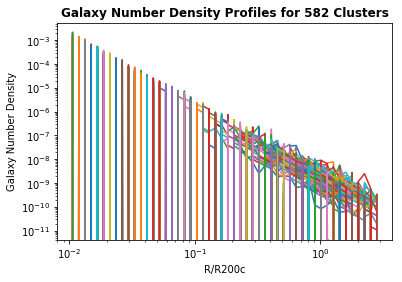

(582, 50)
Xi [[3.96930855e-05 2.74586922e-05 1.07712001e-05 ... 2.49256676e-11
  1.32314557e-11 6.98037193e-12]
 [3.96930855e-05 2.74586922e-05 1.07712001e-05 ... 2.49256676e-11
  1.32314557e-11 6.98037193e-12]
 [3.96930855e-05 2.74586922e-05 1.07712001e-05 ... 2.49256676e-11
  1.32314557e-11 6.98037193e-12]
 ...
 [3.96930855e-05 2.74586922e-05 1.07712001e-05 ... 2.49256676e-11
  1.32314557e-11 6.98037193e-12]
 [3.96930855e-05 2.74586922e-05 1.07712001e-05 ... 2.49256676e-11
  1.32314557e-11 6.98037193e-12]
 [3.96930855e-05 2.74586922e-05 1.07712001e-05 ... 2.49256676e-11
  1.32314557e-11 6.98037193e-12]]
shape of Xi_avg (50,)
shapeof Xi_avg_array (582, 50)
shape of covariance matrix (50, 50)
[[ 3.85233376e-35  5.57574623e-36  1.85013398e-35 ...  4.10893553e-41
  -9.66808359e-42  3.38382926e-42]
 [ 5.57574623e-36  8.07015902e-37  2.67782549e-36 ...  5.94714353e-42
  -1.39932789e-42  4.89764761e-43]
 [ 1.85013398e-35  2.67782549e-36  8.88551186e-36 ...  1.97337035e-41
  -4.64322436e-42 

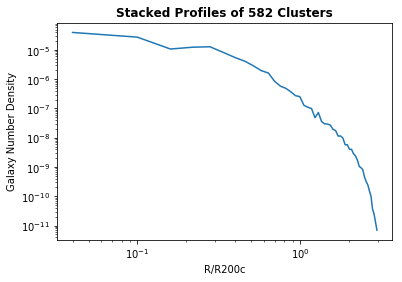

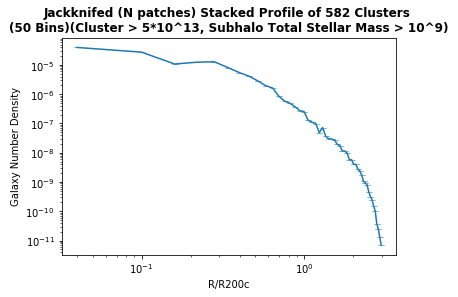

[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108. 110.
 112. 114. 116. 118. 120. 122. 124. 126. 128. 130. 132. 134. 136. 138.
 140. 142. 144. 146. 148. 150. 152. 154. 156. 158. 160. 162. 164. 166.
 168. 170. 172. 174. 176. 178. 180. 182. 184. 186. 188. 190. 192. 194.
 196. 198. 200. 202. 204. 206. 208. 210. 212. 214. 216. 218. 220. 222.
 224. 226. 228. 230. 232. 234. 236. 238. 240. 242. 244. 246. 248. 250.
 252. 254. 256. 258. 260. 262. 264. 266. 268. 270. 272. 274. 276. 278.
 280. 282. 284. 286. 288. 290. 292. 294. 296. 298. 300. 302. 304. 306.
 308. 310. 312. 314. 316. 318. 320. 322. 324. 326. 328. 330. 332. 334.
 336. 338. 340. 342. 344. 346. 348. 350. 352. 354. 356. 358. 360. 362.
 364. 366. 368. 370. 372. 374. 376. 378. 380. 382. 384. 386. 388. 390.
 392. 

Text(0.5, 1.0, 'Jackknifed (N/2 patches) Stacked Profile of 582 Clusters \n (50 Bins)(Cluster > 5*10^13, Subhalo Total Stellar Mass > 10^9)')

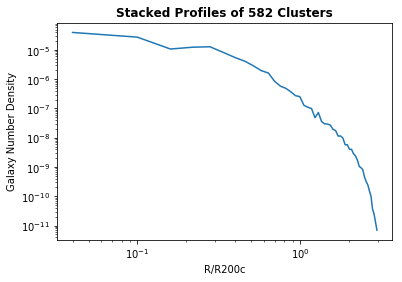

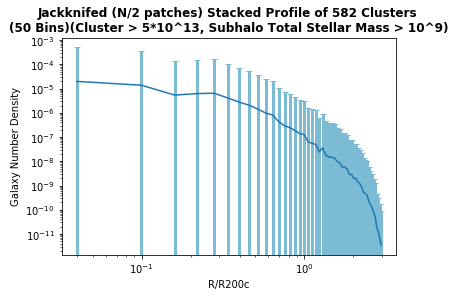

In [130]:
plt.rcParams['figure.facecolor'] = 'w'

mask_halomass = ((halo_grp['GroupMass']/0.704)>=((5*(10**3))))#&(halo_grp['GroupNsubs']>=10)
Number_of_halos = len(halo_grp['GroupMass'][mask_halomass])
print("Number of halos with mass > 10^14 Msun:", Number_of_halos)

halo_array = np.arange(0,len(halo_grp['GroupMass']))
halo_array_masked = halo_array[mask_halomass]
print(halo_array_masked)

NDensity_list = []
ND_boot = []

for h_i in halo_array_masked:
    print("\nHalo:", h_i)
    print("Halo # of Subhalos:", halo_grp['GroupNsubs'][h_i])
    print("Halo Mass:", halo_grp['GroupMass'][h_i])
    #print("Index of first subhalo:", halo_grp['GroupFirstSub'][h_i])
    iFS = halo_grp['GroupFirstSub'][h_i]
    #print(subhalo_grp['SubhaloGrNr'][iFS]) #635-783 is halo  in subhalo catalog
    N_subhalos = halo_grp['GroupNsubs'][h_i]
    print("N Subhalos:",N_subhalos)

    # MASKING OF SUBHALO MASS
    #subhalomass = np.array((np.sum(subhalo_grp['SubhaloMassInRadType'], axis=1)*(1e10)/0.704))
    #subhalomass = (subhalo_grp['SubhaloMass'])*(1e10)/0.704
    #subhalomass = np.array(((subhalo_grp['SubhaloStellarPhotometricsMassInRad'])*(1e10)/0.704))
    #subhalomass = np.array(((subhalo_grp['SubhaloMassInRadType'][:,4])*1e10))
    subhalomass = np.array(((subhalo_grp['SubhaloMassType'][:,4])*(1e10)/0.704))
    #mask = np.logical_and((subhalo_grp['SubhaloGrNr'])==h_i , subhalo_grp['SubhaloFlag']==True) #masking so not flagged halos that are in halo
    mask = ((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalo_grp['SubhaloFlag']==True)&(subhalomass >= (10**9))#(subhalomass>(10))
    print("N Subhalos after masking:", len(subhalo_grp['SubhaloGrNr'][mask]))
    median = np.median(subhalomass[mask])
    print(np.shape(subhalomass[mask]), "median:", median)
    print(subhalomass[mask])
    mask1 = ((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalo_grp['SubhaloFlag']==True)&(subhalomass >10**9)#> median)
    print("N Subhalos after second masking:", len(subhalo_grp['SubhaloGrNr'][mask1]))
    #print(subhalo_grp['SubhaloGrNr'][mask1])

    # COORDINATES
    CM_coords = subhalo_grp['SubhaloCM'][mask1]
    CM_halo = halo_grp['GroupCM'][h_i]


    # MAKING PROFILE
    r_subhalo = np.sqrt((CM_coords[:,0] - CM_halo[0])**2 + (CM_coords[:,1] - CM_halo[1])**2 + (CM_coords[:,2] - CM_halo[2])**2) # in ckpc/h
    

    R500c = halo_grp['Group_R_Crit500'][h_i]
    R200c = halo_grp['Group_R_Crit200'][h_i]
    R200m = halo_grp['Group_R_Mean200'][h_i]
    M200m = halo_grp['Group_M_Mean200'][h_i]
    print("R500c, R200c, R200m:",R500c, R200c, R200m)
    RScale = R200c
    
    bins = 50
    bin_edge = np.logspace(np.log10(.01*RScale), np.log10(3*RScale), num=bins+1) #3.5 earlier
    #bin_edge = np.linspace((.01*RScale), (3*RScale), num=bins+1) #3.5 earlier

    bin_min = bin_edge[:-1]
    bin_max = bin_edge[1:]

    
    NDensity = []
    galaxies = []
    for i in range(0,bins):
        mask_sep = (r_subhalo >=bin_min[i])*(r_subhalo < bin_max[i])
        r_masked = r_subhalo[mask_sep]
        number = len(r_masked)
        delta_r = bin_max[i] - bin_min[i]
        volume = (4/3)*np.pi*(((bin_max[i])**3) - ((bin_min[i])**3))
        density = number/volume
        r = (bin_min[i] + bin_max[i])/2
        galaxies.append(number)
        NDensity.append(density)
        #print(r, number, density)
    print(sum(galaxies))
    r_shell = (bin_min + bin_max)/2
    r_stack = r_shell/RScale
    #print(r_stack)
    #bin_divided = np.linspace(.01,3,num=bins+1)
    #bin_stack = (bin_divided[1:]+bin_divided[:-1])/2
    #print(bin_stack)
    NDensity_list.append(NDensity) #/M200m
    #plt.figure()
    plt.plot(r_stack, NDensity, '-') #/M200m
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('R/R200c')
    plt.ylabel('Galaxy Number Density') #/M200m
    plt.title('Galaxy Number Density Profiles for %s Clusters' %(Number_of_halos), fontweight = 'bold')

plt.show()

NDensity_array = (np.array(NDensity_list))[:]
print(np.shape(NDensity_array))


N = len(NDensity_array)
Njk = N
R = len(NDensity_array[0])
Xi = np.zeros((N, R))
#print(np.linspace(0,N, int(Njk), endpoint=False))
for n in range(Njk):
    #n = int(n)
    #print(n)
    np.delete(NDensity_array, n, axis=0)
    #np.delete(NDensity_array, n+1, axis=0)
    #print("shape of NDensity_array:",np.shape(NDensity_array))
    njk_profile = np.mean(NDensity_array, axis=0)
    #print("shape of njk_profile:", np.shape(njk_profile))
    Xi[n,:] = njk_profile
print("Xi", Xi)
Xi_avg = np.mean(Xi, axis=0)
print("shape of Xi_avg", np.shape(Xi_avg))
Xi_avg_array = np.tile(Xi_avg, (N,1))
print("shapeof Xi_avg_array", np.shape(Xi_avg_array))
minus_array2 = Xi - Xi_avg_array

Xi_cov = np.zeros((R,R))
for i in range(R):
    for j in range(R):
        Xi_cov[i,j] = ((Njk - 1.)/Njk)*(np.sum(minus_array2[:,i]*minus_array2[:,j]))
print("shape of covariance matrix", np.shape(Xi_cov))
print(Xi_cov)

jk_err = np.sqrt(np.diag(Xi_cov))
print("jk_err:",jk_err)
#print("ND_err:",ND_err)


        
bin_divided = np.linspace(.01,3,num=bins+1)
bin_stack = (bin_divided[1:]+bin_divided[:-1])/2
NDensity_stack = np.mean(NDensity_list, axis=0)
plt.figure()
plt.plot(bin_stack, NDensity_stack, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')#  (scaled by M200m)
plt.title('Stacked Profiles of %s Clusters' %(Number_of_halos), fontweight = 'bold', wrap=True)

#PLOTTING STACK
'''
plt.figure()
plt.errorbar(bin_stack, ND_boot_stack, yerr = ND_err, ecolor = '#7CBBD4', elinewidth = 2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('Bootstrapped Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13, Subhalo Total Stellar Mass > 10^9)' %(Number_of_halos, bins), fontweight = 'bold', wrap=True)
#plt.ylim(1e-12, 1e-6)
'''
plt.figure()
plt.errorbar(bin_stack, Xi_avg, yerr = jk_err, ecolor = '#7CBBD4', elinewidth = 3, capsize=3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('Jackknifed (N patches) Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13, Subhalo Total Stellar Mass > 10^9)' %(Number_of_halos, bins), fontweight = 'bold', wrap=True)
#plt.ylim(1e-12, 1e-6)
plt.show()

N = len(NDensity_array)
Njk = int(N/2) #N
R = len(NDensity_array[0])
Xi = np.zeros((N, R))
print(np.linspace(0,N, int(Njk), endpoint=False))
for n in np.linspace(0,N, int(Njk), endpoint=False):#range(Njk):
    n = int(n)
    #print(n)
    np.delete(NDensity_array, n, axis=0)
    np.delete(NDensity_array, n+1, axis=0)
    #print("shape of NDensity_array:",np.shape(NDensity_array))
    njk_profile = np.mean(NDensity_array, axis=0)
    #print("shape of njk_profile:", np.shape(njk_profile))
    Xi[n,:] = njk_profile
print("Xi", Xi)
Xi_avg = np.mean(Xi, axis=0)
print("shape of Xi_avg", np.shape(Xi_avg))
Xi_avg_array = np.tile(Xi_avg, (N,1))
print("shapeof Xi_avg_array", np.shape(Xi_avg_array))
minus_array2 = Xi - Xi_avg_array

Xi_cov = np.zeros((R,R))
for i in range(R):
    for j in range(R):
        Xi_cov[i,j] = ((Njk - 1.)/Njk)*(np.sum(minus_array2[:,i]*minus_array2[:,j]))
print("shape of covariance matrix", np.shape(Xi_cov))
print(Xi_cov)

jk_err = np.sqrt(np.diag(Xi_cov))
print("jk_err:",jk_err)
#print("ND_err:",ND_err)


        
    



bin_divided = np.linspace(.01,3,num=bins+1)
bin_stack = (bin_divided[1:]+bin_divided[:-1])/2
NDensity_stack = np.mean(NDensity_list, axis=0)
plt.figure()
plt.plot(bin_stack, NDensity_stack, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')#  (scaled by M200m)
plt.title('Stacked Profiles of %s Clusters' %(Number_of_halos), fontweight = 'bold', wrap=True)

#PLOTTING STACK
'''
plt.figure()
plt.errorbar(bin_stack, ND_boot_stack, yerr = ND_err, ecolor = '#7CBBD4', elinewidth = 2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('Bootstrapped Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13, Subhalo Total Stellar Mass > 10^9)' %(Number_of_halos, bins), fontweight = 'bold', wrap=True)
#plt.ylim(1e-12, 1e-6)
'''
plt.figure()
plt.errorbar(bin_stack, Xi_avg, yerr = jk_err, ecolor = '#7CBBD4', elinewidth = 3, capsize=3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('Jackknifed (N/2 patches) Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13, Subhalo Total Stellar Mass > 10^9)' %(Number_of_halos, bins), fontweight = 'bold', wrap=True)
#plt.ylim(1e-12, 1e-6)

## Functions for Bootstrapping, Basic Subhalo Cuts

In [5]:
def basic_sub_cuts(subhalos, field):
    
    #subhalos = subhalos[field][subhalos['SubhaloFlag']]
    #subhalos = subhalos[subhalos['SubhaloMass']!=0]
    #subhalos = subhalos[subhalos['SubhaloMassType'][:,4]!=0]
    mask1 = subhalos['SubhaloStellarPhotometrics']<8e+36
    photo_mask = mask1[:,0]
    for i in range (1,8):
        photo_mask = photo_mask & mask1[:,i]
    #subhalos = subhalos[photo_mask]
    mask = (subhalos['SubhaloFlag'])&(subhalos['SubhaloMass']!=0)&(subhalos['SubhaloMassType'][:,4]!=0)&(photo_mask)
    return subhalos[field][mask]
#print(len(subhalo_grp[]))
def Bootstrap_Covariance(NDensity_list, Nb, R):
    halo_array2 = np.arange(0,len(NDensity_list))
    halo_boot = astats.bootstrap(halo_array2, bootnum=300, samples=None)
    resampled_list = []
    for b in range(0,300):
        mask_b = (np.array(halo_boot[b].astype(int)))
        resampled_profile = np.mean((np.array(NDensity_list))[mask_b], axis=0)
        resampled_list.append(resampled_profile)
    resampled_array = np.array(resampled_list)
    Yi = resampled_array
    Yi_avg = np.mean(Yi, axis=0)
    Yi_avg_array = np.tile(Yi_avg, (Nb,1))
    minus_array = Yi - Yi_avg_array
    Yi_cov = np.zeros((R,R))
    for i in range(R):
        for j in range(R):
            Yi_cov[i,j] = (1./(Nb-1.))*(np.sum(minus_array[:,i]*minus_array[:,j]))
    boot_err = np.sqrt(np.diag(Yi_cov))
    return Yi_avg, Yi_cov, boot_err

## Color Splitting Profiles

Number of halos with mass > 10^14 Msun: 582
[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  186  187  1

Halo: 5
Halo # of Subhalos: 72
Halo Mass: 33766.055
N Subhalos: 72
N Subhalos after masking: 72
(72,) median: 0.0
N Subhalos after second masking: 32
gmr [0.669199   0.70101166 0.5995712  0.6721344  0.69462013 0.27685928
 0.32536507 0.32622528 0.45160866 0.379385   0.44485283 0.17435074
 0.6416092  0.27412987 0.536335   0.37380219 0.27691078 0.5320587
 0.6185112  0.59259415 0.38764954 0.64393616 0.57058525 0.58429146
 0.24127197 0.36382103 0.48963165 0.42032623 0.44392395 0.6187515
 0.37078285 0.4237976 ]
R500c, R200c, R200m: 0.697606855429195 1.2112783809739611 1.5880368026886909
galaxies [1, 0, 0, 0, 1, 1, 3, 5, 5, 5, 5, 4, 2, 0, 0]
blue galaxies counted [0, 0, 0, 0, 1, 1, 1, 5, 2, 4, 2, 2, 2, 0, 0]
red galaxies ccounted [1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1, 0, 0, 0]
32

Halo: 6
Halo # of Subhalos: 72
Halo Mass: 39636.156
N Subhalos: 72
N Subhalos after masking: 72
(72,) median: 0.0
N Subhalos after second masking: 32
gmr [0.6186924  0.61081696 0.45110512 0.30660248 0.33143044 0.20626

(29,) median: 2571286500.0
N Subhalos after second masking: 16
gmr [0.66864014 0.4091568  0.580698   0.63235855 0.3999157  0.61265945
 0.632288   0.69459724 0.58101463 0.5923481  0.44571304 0.45883942
 0.631485   0.48896027 0.6325741  0.5966377 ]
R500c, R200c, R200m: 0.7161499148189461 1.0664916265217503 1.3047659902586752
galaxies [0, 1, 0, 0, 2, 1, 1, 1, 1, 3, 3, 1, 0, 0, 0]
blue galaxies counted [0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0]
14

Halo: 22
Halo # of Subhalos: 33
Halo Mass: 19207.387
N Subhalos: 33
N Subhalos after masking: 33
(33,) median: 0.0
N Subhalos after second masking: 15
gmr [0.68699074 0.46265602 0.71027946 0.4804783  0.6514244  0.43792343
 0.6012306  0.672739   0.6435547  0.38739395 0.69828415 0.33273888
 0.6397419  0.62192154 0.5739918 ]
R500c, R200c, R200m: 0.7230556870847399 1.07558854572936 1.3307682527111824
galaxies [0, 0, 1, 2, 1, 3, 1, 1, 0, 2, 3, 0, 0, 0, 0]
blue galaxies counted [0,

N Subhalos after masking: 38
(38,) median: 739686300.0
N Subhalos after second masking: 20
gmr [ 0.6398468  -0.03967285  0.68546486  0.54148865  0.643898    0.62895966
  0.4112072   0.50852966  0.5689812   0.398077    0.2977848   0.41527367
  0.47566605  0.43196487  0.64369965  0.4396038   0.5540848   0.5378456
  0.5426903   0.57126045]
R500c, R200c, R200m: 0.6724388904717795 1.0080863662300854 1.2354392861303691
galaxies [0, 0, 0, 2, 2, 2, 2, 1, 2, 2, 3, 2, 0, 0, 0]
blue galaxies counted [0, 0, 0, 2, 1, 1, 1, 1, 1, 2, 3, 1, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
18

Halo: 36
Halo # of Subhalos: 38
Halo Mass: 21452.682
N Subhalos: 38
N Subhalos after masking: 38
(38,) median: 651432300.0
N Subhalos after second masking: 20
gmr [0.6609783  0.12445641 0.27876663 0.5119724  0.40822983 0.4589634
 0.38544464 0.5142727  0.22249222 0.04740524 0.6738281  0.48826027
 0.49671555 0.62485695 0.60653496 0.5775757  0.613472   0.40446663
 0.50709915 0.38427734]
R

(27,) median: 0.0
N Subhalos after second masking: 12
gmr [0.6853142  0.11341858 0.5633049  0.6641731  0.47249603 0.6053963
 0.33706856 0.40169716 0.62273026 0.55013466 0.5289993  0.5444622 ]
R500c, R200c, R200m: 0.7187710909106416 1.0482834575926763 1.2697556350376107
galaxies [0, 0, 0, 1, 0, 2, 4, 1, 1, 0, 2, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
11

Halo: 54
Halo # of Subhalos: 22
Halo Mass: 13489.049
N Subhalos: 22
N Subhalos after masking: 22
(22,) median: 2429917200.0
N Subhalos after second masking: 14
gmr [0.6510315  0.6383896  0.34567833 0.49563026 0.5535183  0.6283264
 0.5970993  0.68058777 0.49746895 0.50671387 0.529747   0.494215
 0.40223503 0.40312004]
R500c, R200c, R200m: 0.5949610241831593 0.9162140105784289 1.1174929017226947
galaxies [0, 0, 0, 0, 2, 1, 0, 2, 4, 2, 2, 0, 1, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 4, 2, 2, 0, 0, 0, 0]
red galaxies cc

Halo: 72
Halo # of Subhalos: 13
Halo Mass: 11323.668
N Subhalos: 13
N Subhalos after masking: 13
(13,) median: 748918300.0
N Subhalos after second masking: 7
gmr [0.68250275 0.6076908  0.6384506  0.6428585  0.56591034 0.5307598
 0.43952942]
R500c, R200c, R200m: 0.6174616938157989 0.9098075316128129 1.1108907430024189
galaxies [0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
6

Halo: 73
Halo # of Subhalos: 24
Halo Mass: 11493.97
N Subhalos: 24
N Subhalos after masking: 24
(24,) median: 0.0
N Subhalos after second masking: 11
gmr [0.68626785 0.6229496  0.6666622  0.53892326 0.41617966 0.34469795
 0.13395691 0.42842293 0.4422016  0.3621006  0.43014336]
R500c, R200c, R200m: 0.5758547528520688 0.8485801268327751 1.0503290815783242
galaxies [0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 3, 1, 1, 1]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 1]
red gala

N Subhalos after masking: 28
(28,) median: 1601525600.0
N Subhalos after second masking: 18
gmr [0.51638603 0.65065956 0.34233093 0.59628105 0.5668144  0.7167034
 0.61034966 0.35925102 0.50632095 0.5606384  0.640522   0.609745
 0.55718994 0.43419075 0.3442669  0.5449352  0.53417397 0.4217205 ]
R500c, R200c, R200m: 0.46505082165726547 0.7911347266337866 1.0468779298925408
galaxies [0, 0, 0, 0, 2, 0, 0, 1, 5, 3, 3, 3, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 0, 4, 1, 2, 3, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0]
17

Halo: 94
Halo # of Subhalos: 11
Halo Mass: 10118.616
N Subhalos: 11
N Subhalos after masking: 11
(11,) median: 0.0
N Subhalos after second masking: 5
gmr [0.68649864 0.33848953 0.6518688  0.29314613 0.56003   ]
R500c, R200c, R200m: 0.5935684053189166 0.8883404787255067 1.0782719913157814
galaxies [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0]
red galaxies ccount

Halo: 111
Halo # of Subhalos: 15
Halo Mass: 9232.283
N Subhalos: 15
N Subhalos after masking: 15
(15,) median: 10032293000.0
N Subhalos after second masking: 9
gmr [0.62703705 0.23273277 0.5209484  0.14475822 0.48277092 0.74484444
 0.6245804  0.60946846 0.37373924]
R500c, R200c, R200m: 0.538147247069031 0.8264935635568431 1.025506584365622
galaxies [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8

Halo: 112
Halo # of Subhalos: 24
Halo Mass: 10389.734
N Subhalos: 24
N Subhalos after masking: 24
(24,) median: 0.0
N Subhalos after second masking: 8
gmr [ 0.64037895  0.6333866   0.6777859   0.61156654 -0.10771751  0.22632599
  0.2096138   0.38690376]
R500c, R200c, R200m: 0.4072427514102266 0.5904424766836703 0.7244182801104295
galaxies [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 0, 2]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
red galax

N Subhalos after second masking: 12
gmr [0.54499626 0.44651413 0.01104355 0.5559864  0.38957214 0.38851357
 0.5392246  0.5511608  0.55628204 0.47390938 0.6374798  0.4050846 ]
R500c, R200c, R200m: 0.4776872071856444 0.7815980539990388 0.9963525187389638
galaxies [1, 0, 1, 0, 1, 0, 2, 0, 4, 2, 0, 0, 0, 0, 0]
blue galaxies counted [1, 0, 0, 0, 1, 0, 2, 0, 4, 1, 0, 0, 0, 0, 0]
red galaxies ccounted [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11

Halo: 134
Halo # of Subhalos: 20
Halo Mass: 8360.018
N Subhalos: 20
N Subhalos after masking: 20
(20,) median: 0.0
N Subhalos after second masking: 8
gmr [0.66539764 0.30828094 0.53609276 0.43802452 0.07718658 0.58148766
 0.49620247 0.5213566 ]
R500c, R200c, R200m: 0.47416943567057185 0.7454288606377669 0.9658091894080532
galaxies [0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 2, 1, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 1, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7

Halo: 135
Halo # of Subhalos: 11
H

N Subhalos after masking: 19
(19,) median: 4829772000.0
N Subhalos after second masking: 12
gmr [0.6195736  0.3582573  0.625782   0.4638195  0.22947502 0.38768005
 0.28871727 0.27825546 0.31393242 0.50281525 0.55064774 0.49291992]
R500c, R200c, R200m: 0.41996861734951996 0.6800942850932613 0.8631219020326519
galaxies [0, 0, 0, 0, 0, 0, 2, 3, 0, 1, 1, 5, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 5, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
12

Halo: 156
Halo # of Subhalos: 21
Halo Mass: 8047.719
N Subhalos: 21
N Subhalos after masking: 21
(21,) median: 474926270.0
N Subhalos after second masking: 12
gmr [ 0.66526985  0.43889427  0.47410583  0.3016243   0.3107128  -0.06177521
  0.233284    0.08695412  0.48781776  0.4723339   0.39967728  0.51359177]
R500c, R200c, R200m: 0.4612120921255411 0.7111120567935778 0.9008617652060998
galaxies [0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 5, 2, 1, 1, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

Halo: 177
Halo # of Subhalos: 20
Halo Mass: 7223.955
N Subhalos: 20
N Subhalos after masking: 20
(20,) median: 382956320.0
N Subhalos after second masking: 10
gmr [0.58542633 0.08697319 0.17325401 0.6954956  0.39985275 0.2643051
 0.36611938 0.45642662 0.368639   0.39880562]
R500c, R200c, R200m: 0.420870160212204 0.7245085282274435 0.9134429327624431
galaxies [1, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0]
blue galaxies counted [1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
10

Halo: 178
Halo # of Subhalos: 21
Halo Mass: 7039.7437
N Subhalos: 21
N Subhalos after masking: 21
(21,) median: 0.0
N Subhalos after second masking: 7
gmr [0.5760174  0.5870037  0.29966354 0.3332367  0.6470089  0.45865822
 0.4025898 ]
R500c, R200c, R200m: 0.4744587187022351 0.7410956430773759 0.9212498782546508
galaxies [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0]
red galaxies ccou

R500c, R200c, R200m: 0.5180898163143903 0.7767439905005694 0.9447178007053681
galaxies [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4

Halo: 198
Halo # of Subhalos: 14
Halo Mass: 7626.3076
N Subhalos: 14
N Subhalos after masking: 14
(14,) median: 1676612900.0
N Subhalos after second masking: 9
gmr [0.67183495 0.61637306 0.52868843 0.5898857  0.43026352 0.37197113
 0.47414207 0.58651733 0.58158875]
R500c, R200c, R200m: 0.5534423409872965 0.797136994121309 0.967748244413686
galaxies [0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
8

Halo: 199
Halo # of Subhalos: 18
Halo Mass: 6870.246
N Subhalos: 18
N Subhalos after masking: 18
(18,) median: 6375747600.0
N Subhalos after second masking: 13
gmr [0.6120987  0.64673996 0.620

gmr [0.5742607  0.47828102 0.3404312  0.08964539 0.53582954 0.37160873
 0.4477558  0.54732513 0.19694328 0.50458145 0.5206547  0.5306778
 0.33178902 0.72193336 0.39615822]
R500c, R200c, R200m: 0.4019924093966903 0.622485391928668 0.7642852578502948
galaxies [0, 0, 0, 0, 1, 0, 0, 3, 2, 2, 3, 3, 1, 0, 0]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 3, 0, 1, 3, 3, 1, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
15

Halo: 216
Halo # of Subhalos: 11
Halo Mass: 6384.977
N Subhalos: 11
N Subhalos after masking: 11
(11,) median: 1942391000.0
N Subhalos after second masking: 8
gmr [0.6612625  0.3645954  0.51787186 0.38386154 0.49893188 0.52075005
 0.5536823  0.57680416]
R500c, R200c, R200m: 0.49436678797021105 0.7343903274041933 0.9076120627699931
galaxies [0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0]
blue galaxies counted [0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7

Halo: 217
Halo # of Subhalos:

gmr [0.58699226 0.23285103 0.36697197 0.57359505 0.5229702  0.40921402
 0.30261993 0.38882446 0.49084854 0.47084427]
R500c, R200c, R200m: 0.5081864644997399 0.7381739242645597 0.8969660263881081
galaxies [0, 0, 0, 1, 3, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9

Halo: 236
Halo # of Subhalos: 17
Halo Mass: 6159.989
N Subhalos: 17
N Subhalos after masking: 17
(17,) median: 0.0
N Subhalos after second masking: 8
gmr [ 0.69161797  0.07011032  0.23496056 -0.1206398   0.18735695  0.44306946
  0.37992287  0.48644638]
R500c, R200c, R200m: 0.4957501374941428 0.739632395251992 0.9022479580859551
galaxies [0, 0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7

Halo: 237
Halo # of Subhalos: 15
Halo Mass: 6000.054
N Subhalos: 15
N Subhalos after ma

Halo: 256
Halo # of Subhalos: 11
Halo Mass: 5553.7163
N Subhalos: 11
N Subhalos after masking: 11
(11,) median: 1715860900.0
N Subhalos after second masking: 10
gmr [0.6760216  0.42948723 0.31904984 0.38184738 0.5838318  0.43952942
 0.3982563  0.49666405 0.44516563 0.35386276]
R500c, R200c, R200m: 0.47561312120720156 0.7188648079218823 0.8826293140174387
galaxies [0, 0, 0, 0, 0, 0, 1, 4, 2, 2, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 4, 2, 2, 0, 0, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9

Halo: 257
Halo # of Subhalos: 14
Halo Mass: 5940.919
N Subhalos: 14
N Subhalos after masking: 14
(14,) median: 1341257600.0
N Subhalos after second masking: 9
gmr [0.6355877  0.45999146 0.36275864 0.21757507 0.44170952 0.55745316
 0.41685867 0.407547   0.52861786]
R500c, R200c, R200m: 0.460056523844646 0.7068860906186234 0.8717187886675437
galaxies [0, 0, 0, 0, 0, 0, 1, 0, 2, 3, 0, 2, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 3,

N Subhalos after masking: 12
(12,) median: 191181780.0
N Subhalos after second masking: 6
gmr [0.6546173  0.14735413 0.4986477  0.44441795 0.42990685 0.6293659 ]
R500c, R200c, R200m: 0.47952213849735636 0.7147762327051546 0.8731787382000562
galaxies [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0]
red galaxies ccounted [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5

Halo: 275
Halo # of Subhalos: 11
Halo Mass: 5380.68
N Subhalos: 11
N Subhalos after masking: 11
(11,) median: 0.0
N Subhalos after second masking: 5
gmr [0.6141987  0.37875938 0.40291405 0.22023392 0.3988266 ]
R500c, R200c, R200m: 0.4777966195215831 0.7126294421157462 0.8645669523801249
galaxies [0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4

Halo: 276
Halo # of Subhalos: 18
Halo Mass: 5321.1865
N Subhalos: 18
N Subhalos aft

N Subhalos after masking: 13
(13,) median: 0.0
N Subhalos after second masking: 6
gmr [0.65076256 0.56630516 0.5185566  0.20282173 0.42804527 0.46904755]
R500c, R200c, R200m: 0.5030197455839156 0.7373714723558118 0.8962926628382899
galaxies [0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5

Halo: 291
Halo # of Subhalos: 11
Halo Mass: 5468.1655
N Subhalos: 11
N Subhalos after masking: 11
(11,) median: 593968800.0
N Subhalos after second masking: 6
gmr [0.6636238  0.51130867 0.27205658 0.40470886 0.53172874 0.44586372]
R500c, R200c, R200m: 0.45952029535102135 0.6893528206515662 0.8472170788701376
galaxies [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5

Halo: 292
Halo # of Subhalos: 8
Halo Mass: 5400.2266
N Subhalos: 8
N S

Halo: 310
Halo # of Subhalos: 11
Halo Mass: 4924.3584
N Subhalos: 11
N Subhalos after masking: 11
(11,) median: 1186560300.0
N Subhalos after second masking: 7
gmr [0.4034462  0.20574951 0.2938404  0.52885437 0.34214783 0.73433495
 0.6372299 ]
R500c, R200c, R200m: 0.4022844504835994 0.6673256835144367 0.8373669546783762
galaxies [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
5

Halo: 311
Halo # of Subhalos: 7
Halo Mass: 5681.021
N Subhalos: 7
N Subhalos after masking: 7
(7,) median: 550599200.0
N Subhalos after second masking: 4
gmr [0.67552376 0.33088493 0.31004906 0.31544876]
R500c, R200c, R200m: 0.503885376861285 0.7291159021659845 0.893322322639181
galaxies [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3

Halo: 312


N Subhalos after second masking: 5
gmr [0.53409386 0.34678078 0.3480873  0.47488022 0.45549965]
R500c, R200c, R200m: 0.4527611549502057 0.6789163964683663 0.8296436038503213
galaxies [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4

Halo: 331
Halo # of Subhalos: 10
Halo Mass: 4977.085
N Subhalos: 10
N Subhalos after masking: 10
(10,) median: 1332731100.0
N Subhalos after second masking: 6
gmr [0.53661346 0.18047523 0.6915684  0.4942398  0.1177845  0.5258732 ]
R500c, R200c, R200m: 0.4596956451108274 0.6877127160877368 0.8426924465889722
galaxies [0, 0, 0, 1, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5

Halo: 332
Halo # of Subhalos: 9
Halo Mass: 5188.431
N Subhalos: 9
N Subhalos after masking: 9
(9,) median: 760353200.0
N Subhalos

N Subhalos after second masking: 1
gmr [0.63700485]
R500c, R200c, R200m: 0.43746526489228166 0.66347253816818 0.8295217944825559
galaxies [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0

Halo: 352
Halo # of Subhalos: 18
Halo Mass: 4697.3877
N Subhalos: 18
N Subhalos after masking: 18
(18,) median: 376624400.0
N Subhalos after second masking: 10
gmr [0.50660324 0.44569206 0.31085396 0.3451252  0.3401928  0.40132713
 0.3465805  0.40748024 0.41713524 0.3733921 ]
R500c, R200c, R200m: 0.45109312863120693 0.6733297138826317 0.8103833363624108
galaxies [0, 0, 0, 2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0]
blue galaxies counted [0, 0, 0, 2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9

Halo: 353
Halo # of Subhalos: 13
Halo Mass: 4664.316
N Subhalos: 13
N Subhalos after masking: 13
(13,) median: 807846200.0
N Su

N Subhalos after masking: 17
(17,) median: 0.0
N Subhalos after second masking: 4
gmr [0.68447495 0.6055393  0.40957832 0.5172329 ]
R500c, R200c, R200m: 0.4109970048374618 0.6283806354992275 0.7839815255355245
galaxies [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3

Halo: 373
Halo # of Subhalos: 17
Halo Mass: 4599.8364
N Subhalos: 17
N Subhalos after masking: 17
(17,) median: 1125627300.0
N Subhalos after second masking: 14
gmr [0.45049286 0.08498001 0.41581345 0.33740044 0.24326706 0.49007416
 0.5197792  0.3977146  0.49926758 0.54877853 0.44411469 0.35728073
 0.61883163 0.42762375]
R500c, R200c, R200m: 0.3742825979778468 0.6264843445666851 0.7924566028026508
galaxies [0, 0, 0, 1, 0, 0, 0, 3, 0, 3, 2, 4, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 4, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
13



N Subhalos after masking: 12
(12,) median: 3225748500.0
N Subhalos after second masking: 8
gmr [0.6067753  0.6795349  0.35660172 0.20526695 0.23301315 0.13332939
 0.48534775 0.48757362]
R500c, R200c, R200m: 0.4545513887067993 0.677476748497148 0.8130161702133929
galaxies [0, 0, 1, 1, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7

Halo: 395
Halo # of Subhalos: 9
Halo Mass: 4737.444
N Subhalos: 9
N Subhalos after masking: 9
(9,) median: 0.0
N Subhalos after second masking: 3
gmr [0.6500416  0.16122627 0.212286  ]
R500c, R200c, R200m: 0.4640678450809306 0.6792540734178486 0.8290448499599374
galaxies [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2

Halo: 396
Halo # of Subhalos: 9
Halo Mass: 5547.3037
N Subhalos: 9
N Subhalos after ma

Halo: 419
Halo # of Subhalos: 12
Halo Mass: 4134.3013
N Subhalos: 12
N Subhalos after masking: 12
(12,) median: 0.0
N Subhalos after second masking: 5
gmr [ 0.53102875 -0.03679276  0.50774956  0.06181908  0.49978065]
R500c, R200c, R200m: 0.39077795773212576 0.6086230081931673 0.7831389254411358
galaxies [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4

Halo: 420
Halo # of Subhalos: 16
Halo Mass: 4439.0967
N Subhalos: 16
N Subhalos after masking: 16
(16,) median: 0.0
N Subhalos after second masking: 6
gmr [0.5148163  0.4616356  0.19014168 0.53967285 0.66446877 0.52604866]
R500c, R200c, R200m: 0.40027715493580107 0.6297104161975593 0.7832635781648248
galaxies [0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0]
blue galaxies counted [0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
6

Halo: 421
Halo


Halo: 439
Halo # of Subhalos: 16
Halo Mass: 3973.2485
N Subhalos: 16
N Subhalos after masking: 16
(16,) median: 1245466600.0
N Subhalos after second masking: 9
gmr [0.5442009  0.38009644 0.09794807 0.19299698 0.35259247 0.46009445
 0.45708466 0.43066597 0.43268776]
R500c, R200c, R200m: 0.3790324809152768 0.5721642474646398 0.7210931459591783
galaxies [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 3, 1, 1, 0, 0]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 1, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8

Halo: 440
Halo # of Subhalos: 8
Halo Mass: 4371.213
N Subhalos: 8
N Subhalos after masking: 8
(8,) median: 0.0
N Subhalos after second masking: 3
gmr [0.65831375 0.31697655 0.108778  ]
R500c, R200c, R200m: 0.4323128196231936 0.6437349849549401 0.7908814404881156
galaxies [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2

Halo

R500c, R200c, R200m: 0.43245626692953737 0.6415291094294401 0.7913019159620921
galaxies [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0

Halo: 460
Halo # of Subhalos: 18
Halo Mass: 4091.484
N Subhalos: 18
N Subhalos after masking: 18
(18,) median: 1003154940.0
N Subhalos after second masking: 12
gmr [0.4505558  0.2063713  0.6112633  0.53878593 0.36476707 0.12255669
 0.42432213 0.38085365 0.42588234 0.25920486 0.09402275 0.40955353]
R500c, R200c, R200m: 0.4198276153292705 0.6510680567489268 0.7915643008467185
galaxies [0, 0, 1, 1, 1, 0, 2, 1, 3, 1, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 1, 1, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10

Halo: 461
Halo # of Subhalos: 11
Halo Mass: 4102.462
N Subhalos: 11
N Subhalos after masking: 11
(11,) median: 1502216700.0
N Subhalos after second masking

N Subhalos after second masking: 4
gmr [0.5437813  0.13114548 0.57471657 0.5666199 ]
R500c, R200c, R200m: 0.3958007744046586 0.6126353246040251 0.7689687199933503
galaxies [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3

Halo: 481
Halo # of Subhalos: 12
Halo Mass: 4063.7905
N Subhalos: 12
N Subhalos after masking: 12
(12,) median: 208509170.0
N Subhalos after second masking: 6
gmr [0.620636   0.3345089  0.5180607  0.3802185  0.4655552  0.38871002]
R500c, R200c, R200m: 0.4111753685545469 0.6427752385965008 0.784050846552941
galaxies [0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0]
blue galaxies counted [0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5

Halo: 482
Halo # of Subhalos: 12
Halo Mass: 3791.087
N Subhalos: 12
N Subhalos after masking: 12
(12,) median: 456292450.0
N Subhalos after s

galaxies [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5

Halo: 500
Halo # of Subhalos: 5
Halo Mass: 3831.0762
N Subhalos: 5
N Subhalos after masking: 5
(5,) median: 749054900.0
N Subhalos after second masking: 3
gmr [ 0.65724754 -0.27903366  0.33942032]
R500c, R200c, R200m: 0.39192428510626937 0.6090780020080558 0.7548526520423493
galaxies [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2

Halo: 501
Halo # of Subhalos: 11
Halo Mass: 3733.8179
N Subhalos: 11
N Subhalos after masking: 11
(11,) median: 0.0
N Subhalos after second masking: 5
gmr [0.44686127 0.2067585  0.64274025 0.29292297 0.39100456]
R500c, R200c, R200m: 0.4288270927293797 0.6299850275126571 0.7594921559028266
galaxies [0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 

Halo: 521
Halo # of Subhalos: 10
Halo Mass: 4020.8076
N Subhalos: 10
N Subhalos after masking: 10
(10,) median: 663496000.0
N Subhalos after second masking: 5
gmr [0.6421871  0.56209564 0.45484352 0.57398796 0.58524513]
R500c, R200c, R200m: 0.3997160755114045 0.6272409047108267 0.780896484358459
galaxies [0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4

Halo: 522
Halo # of Subhalos: 8
Halo Mass: 3730.0608
N Subhalos: 8
N Subhalos after masking: 8
(8,) median: 0.0
N Subhalos after second masking: 3
gmr [0.6611614 0.4405632 0.5072613]
R500c, R200c, R200m: 0.4196212161227791 0.6237477850916114 0.7695740136023583
galaxies [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2

Halo: 523
Halo # of Subhalos: 14
Halo Mass: 3610.8618


N Subhalos after masking: 8
(8,) median: 762121000.0
N Subhalos after second masking: 4
gmr [0.65675163 0.4443779  0.35144234 0.4502697 ]
R500c, R200c, R200m: 0.39832564603122306 0.6146604195599049 0.7669077987528335
galaxies [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3

Halo: 547
Halo # of Subhalos: 13
Halo Mass: 3652.241
N Subhalos: 13
N Subhalos after masking: 13
(13,) median: 4775312000.0
N Subhalos after second masking: 9
gmr [0.6535988  0.54413986 0.19869995 0.662632   0.43448257 0.25161743
 0.58239555 0.50681496 0.306839  ]
R500c, R200c, R200m: 0.3976498087617514 0.6016126004293865 0.7401117281935862
galaxies [0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 0, 0]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
7

Halo: 548
Halo # of Subhalos: 6
Halo Mass: 3538.1045

Halo: 570
Halo # of Subhalos: 10
Halo Mass: 3593.9941
N Subhalos: 10
N Subhalos after masking: 10
(10,) median: 1205662100.0
N Subhalos after second masking: 7
gmr [0.26162148 0.67072487 0.51535225 0.6924381  0.54055214 0.3017006
 0.30565453]
R500c, R200c, R200m: 0.40294126570194244 0.6030212558210379 0.7362018863302136
galaxies [0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 0, 1, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0]
red galaxies ccounted [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
6

Halo: 571
Halo # of Subhalos: 7
Halo Mass: 3759.1077
N Subhalos: 7
N Subhalos after masking: 7
(7,) median: 0.0
N Subhalos after second masking: 3
gmr [0.669157   0.36411095 0.2983036 ]
R500c, R200c, R200m: 0.4298163246887463 0.6283834219880327 0.7642702449310184
galaxies [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies ccounted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2

Halo: 573
Halo # of Subhal

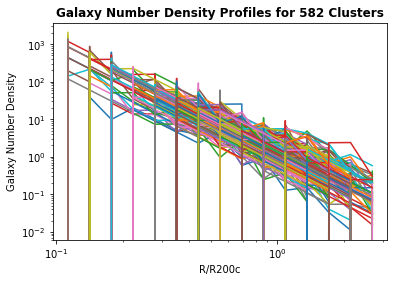

0.7103958879371228


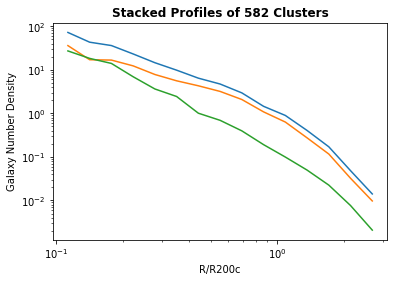

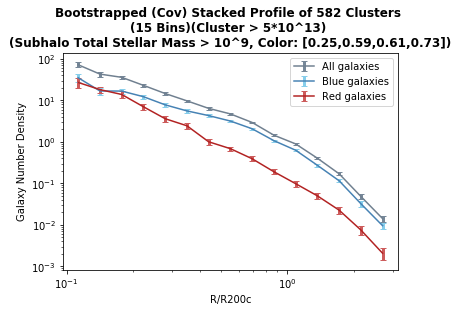

In [125]:
from astropy.cosmology import Planck15 as cosmo
plt.rcParams['figure.facecolor'] = 'w'

scale_factor = header['Time']
mask_halomass = ((halo_grp['GroupMass']/.704)>=((5*(10**3))))#&(halo_grp['GroupNsubs']>=10)
Number_of_halos = len(halo_grp['GroupMass'][mask_halomass])
print("Number of halos with mass > 10^14 Msun:", Number_of_halos)

halo_array = np.arange(0,len(halo_grp['GroupMass']))
halo_array_masked = halo_array[mask_halomass]
print(halo_array_masked)

NDensity_list = []
NDensity_list_b = []
NDensity_list_r = []
ND_boot = []
ND_boot_b = []
ND_boot_r = []
RScale_list = []

mask_photo = subhalo_grp['SubhaloStellarPhotometrics']<8e+36
photo_mask = mask_photo[:,0]
for i in range (1,8):
        photo_mask = photo_mask & mask_photo[:,i]

mask_basic = (photo_mask)&(subhalo_grp['SubhaloFlag'])&(subhalo_grp['SubhaloMass']!=0)&(subhalo_grp['SubhaloMassType'][:,4]!=0)

for h_i in halo_array_masked:
    print("\nHalo:", h_i)
    print("Halo # of Subhalos:", halo_grp['GroupNsubs'][h_i])
    print("Halo Mass:", halo_grp['GroupMass'][h_i])
    #print("Index of first subhalo:", halo_grp['GroupFirstSub'][h_i])
    #iFS = halo_grp['GroupFirstSub'][h_i]
    N_subhalos = halo_grp['GroupNsubs'][h_i]
    print("N Subhalos:",N_subhalos)

    # MASKING OF SUBHALO MASS
    #subhalomass = np.array((np.sum(subhalo_grp['SubhaloMassInRadType'], axis=1)*1e10))
    #subhalomass = (subhalo_grp['SubhaloMass'])*1e10
    #subhalomass = np.array(((subhalo_grp['SubhaloStellarPhotometricsMassInRad'])*1e10))
    #mask = np.logical_and((subhalo_grp['SubhaloGrNr'])==h_i , subhalo_grp['SubhaloFlag']==True) #masking so not flagged halos that are in halo
    #subhalomass = np.array(((subhalo_grp['SubhaloMassInRadType'][:,4])*1e10))
    subhalomass = np.array(((subhalo_grp['SubhaloMassType'][:,4])*(1e10)/0.704))
    mask = ((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalo_grp['SubhaloFlag']==True)#&(submass_stellar >= (10**9))#(subhalomass>(10))
    print("N Subhalos after masking:", len(subhalo_grp['SubhaloGrNr'][mask]))
    median = np.median(subhalomass[mask])
    print(np.shape(subhalomass[mask]), "median:", median)
    #print(subhalomass[mask])
    mask_total = (mask_basic)&((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalomass > 10^9)#median
    print("N Subhalos after second masking:", len(subhalo_grp['SubhaloGrNr'][mask_total]))
    
    # COLOR CUTS
    #Select Color Cuts
    mag = subhalo_grp['SubhaloStellarPhotometrics'][mask_total]
    gmr = mag[:,4]-mag[:,5]
    rmz = mag[:,5]-mag[:,7]
    #blue_mask = (mask_total)&(gmr>0.42)&(gmr<0.52)
    #red_mask = (mask_total)&(gmr>0.6)&(gmr<0.68)
    b1 = .25
    b2 = .59
    r1 = .61
    r2 = .73
    blue_mask_subs = (gmr>b1)&(gmr<b2)#(gmr<0.6)#(gmr<0.53)#
    red_mask_subs = (gmr>r1)&(gmr<r2)#(gmr>=0.6)#(gmr>0.59)#
    print("gmr", gmr)
    
    #Cutting for blue
    #gmr_cut_low_blue = (mag[:,4]-mag[:,5])>0.46
    #rmz_cut_high_blue = (mag[:,5]-mag[:,7])<0.34
    #subhalos_blue = subhalo_grp[gmr_cut_low_blue & rmz_cut_high_blue & mask1]
    ##subhalomass = np.array(np.log10(subhalo_table_blue["SubhaloMassInHalfRad"]*1e10/0.704))
    ##blue_cut_mass=subhalo_table_blue[subhalomass>9]
    #Cutting for red
    #gmr_cut_low_red = (mag[:,4]-mag[:,5])>0.66
    #rmz_cut_low_red = (mag[:,5]-mag[:,7])>0.52
    #subhalos_red = subhalo_grp[gmr_cut_low_red & rmz_cut_low_red & mask1] 
    ##subhalomass = np.array(np.log10(subhalo_table_red["SubhaloMassInHalfRad"]*1e10/0.704))
    ##red_cut_mass=subhalo_table_red[subhalomass>9]
    
    
    
    # COORDINATES
    CM_coords = subhalo_grp['SubhaloCM'][mask_total]
    CM_halo = halo_grp['GroupCM'][h_i]


    # MAKING PROFILE
    #r_subhalo = np.sqrt((CM_coords[:,0] - CM_halo[0])**2 + (CM_coords[:,1] - CM_halo[1])**2 + (CM_coords[:,2] - CM_halo[2])**2) # in ckpc/h
    
    redshift = header['Redshift']
    #H = cosmo.H(redshift)
    #conv_fac = 100/(H.value*1000)
    boxsize = header['BoxSize'] #kpc/h
    box_bounds = boxsize*np.ones(3)#*conv_fac
    
    dev = CM_coords-CM_halo
    for ind, q in enumerate(dev.T):
        q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
        dev.T[ind] = q
    r_subhalo = np.linalg.norm(dev, axis=1)*.001*scale_factor/.704 #Mpc
    
    
    R500c = .001*scale_factor*halo_grp['Group_R_Crit500'][h_i]/.704 #ckpc/h to Mpc
    R200c = .001*scale_factor*halo_grp['Group_R_Crit200'][h_i]/.704
    R200m = .001*scale_factor*halo_grp['Group_R_Mean200'][h_i]/.704
    M200m = halo_grp['Group_M_Mean200'][h_i]/.704
    print("R500c, R200c, R200m:",R500c, R200c, R200m)
    RScale = R200c
    RScale_list.append(RScale)
    
    bins = 15
    bin_edge = RScale*np.logspace(np.log10(.1), np.log10(3), num=bins+1) #3.5 earlier
    bin_min = bin_edge[:-1]
    bin_max = bin_edge[1:]

    
    NDensity = []
    NDensity_blue = []
    NDensity_red = []
    galaxies = []
    galaxies_blue = []
    galaxies_red = []
    
    for i in range(0,bins):
        mask_sep = (r_subhalo >=bin_min[i])&(r_subhalo < bin_max[i])
        r_masked = r_subhalo[mask_sep]
        number = len(r_masked)
        delta_r = bin_max[i] - bin_min[i]
        volume = (4/3)*np.pi*(((bin_max[i])**3) - ((bin_min[i])**3))
        density = number/volume
        r = (bin_min[i] + bin_max[i])/2
        galaxies.append(number)
        NDensity.append(density)
        #print(r, number, density)
        
        number_blue = len(r_subhalo[mask_sep & blue_mask_subs])
        number_red = len(r_subhalo[mask_sep & red_mask_subs])
        NDensity_blue.append(number_blue/volume)
        NDensity_red.append(number_red/volume)
        galaxies_blue.append(number_blue)
        galaxies_red.append(number_red)
    print("galaxies", galaxies)
    print("blue galaxies counted", galaxies_blue)
    print("red galaxies ccounted", galaxies_red)

        
    print(sum(galaxies))
    r_shell = (bin_min + bin_max)/2
    r_stack = r_shell/RScale
    #print(r_stack)
    #bin_divided = np.linspace(.01,3,num=bins+1)
    #bin_stack = (bin_divided[1:]+bin_divided[:-1])/2
    #print(bin_stack)
    NDensity_list.append(NDensity) #/M200m
    NDensity_list_b.append(NDensity_blue)
    NDensity_list_r.append(NDensity_red)

    #plt.figure()
    plt.plot(r_stack, NDensity, '-') #/M200m
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('R/R200c')
    plt.ylabel('Galaxy Number Density') #/M200m
    plt.title('Galaxy Number Density Profiles for %s Clusters' %(Number_of_halos), fontweight = 'bold')

plt.show()

NDensity_stack = np.mean(NDensity_list, axis=0)
NDensity_stack_b = np.mean(NDensity_list_b, axis=0)
NDensity_stack_r = np.mean(NDensity_list_r, axis=0)


Yi_avg, cov, boot_err = Bootstrap_Covariance(NDensity_list, 300, bins)
Yi_avg_blue, cov_blue, boot_err_blue = Bootstrap_Covariance(NDensity_list_b, 300, bins)
Yi_avg_red, cov_red, boot_err_red = Bootstrap_Covariance(NDensity_list_r, 300, bins)



R_avg = np.mean(RScale_list) #Mpc
print(R_avg)
#PLOTTING STACK
bin_divided = np.logspace(np.log10(.1), np.log10(3), num=bins+1)
bin_stack = (bin_divided[1:]+bin_divided[:-1])/2

plt.figure()
plt.plot(bin_stack, NDensity_stack, '-')
plt.plot(bin_stack, NDensity_stack_b, '-')
plt.plot(bin_stack, NDensity_stack_r, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')#  (scaled by M200m)
plt.title('Stacked Profiles of %s Clusters' %(Number_of_halos), fontweight = 'bold', wrap=True)
'''
plt.figure()
plt.errorbar(bin_stack, ND_boot_stack, yerr = ND_err, ecolor = '#7CBBD4', elinewidth = 3, capsize=3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('Bootstrapped Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13, Subhalo Total Stellar Mass > median)' %(Number_of_halos, bins), fontweight = 'bold', wrap=True)
#plt.ylim(1e-12, 1e-6)
'''
plt.figure()
plt.errorbar(bin_stack, Yi_avg, yerr = boot_err, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack, Yi_avg_blue, yerr = boot_err_blue, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
plt.errorbar(bin_stack, Yi_avg_red, yerr = boot_err_red, c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red galaxies')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('Bootstrapped (Cov) Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13) \n (Subhalo Total Stellar Mass > 10^9, Color: [%s,%s,%s,%s])' %(Number_of_halos, bins, b1, b2, r1, r2), fontweight = 'bold', wrap=True)
plt.legend()
#plt.ylim(1e-12, 1e-6)


## Color Plots, Histograms, etc

(64217, 6)
Subhalos with total halfradmass >9.5: 47905
Subhalos with stellar mass > 9: 50291


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


[0.09475534 3.53855167 2.25657916 ... 0.01099012 0.0098919  0.0063788 ]
mag lengths: 50291 4640 3719
8.41253896778663


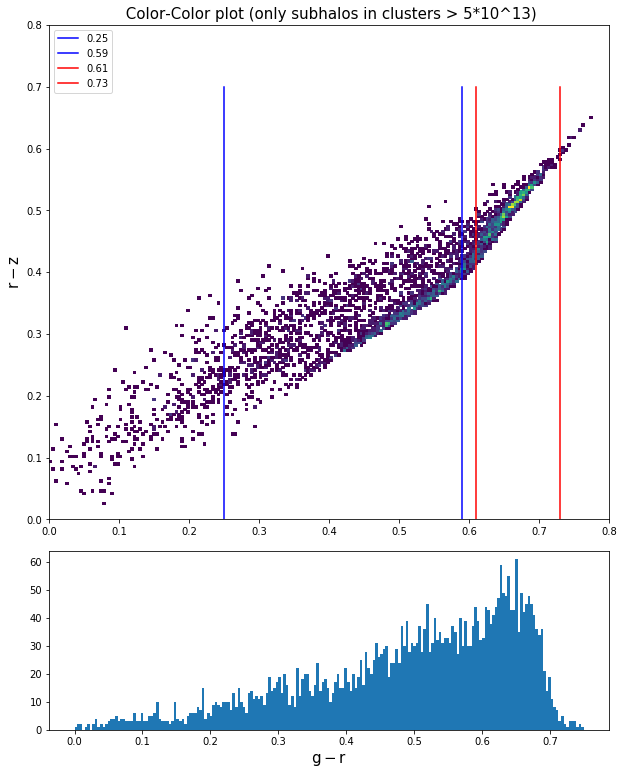

In [129]:
plt.rcParams['figure.facecolor'] = 'w'
import matplotlib.gridspec as gridspec

#BASIC CUTS APPLIED TO SUBHALOS
mag = basic_sub_cuts(subhalo_grp,'SubhaloStellarPhotometrics')

# SUBHALO MASS MASKING
mass = basic_sub_cuts(subhalo_grp,'SubhaloMassType') #previously SubhaloMassInHalfRad (no type specification or index chosen)
mass2 = basic_sub_cuts(subhalo_grp,'SubhaloMassInHalfRad') 
print(np.shape(mass))
subhalomass = np.array(np.log10(mass[:,4]*1e10/0.704)) #previously no index
subhalomass2 = np.array(np.log10(mass2*1e10/0.704))
#mask = ((subhalo_grp['SubhaloMassInHalfRad'][:,4]*1e10)>(10**9.5))
mask = subhalomass>9 #previouslt it was >9.5
mask2 = subhalomass2>9.5
#basic_cuts(subhalo_grp, 'Subhalo')
print("Subhalos with total halfradmass >9.5:",len(mag[mask2]))
print("Subhalos with stellar mass > 9:", len(mag[mask]))
group_numbers = basic_sub_cuts(subhalo_grp,'SubhaloGrNr')
sub_pos = basic_sub_cuts(subhalo_grp, 'SubhaloCM')
mag = mag[mask]
stellar_mass = subhalomass[mask]

# CLUSTER MASS MASKING
w = (group_numbers[mask])
cluster_mass = []
for h_i in group_numbers[mask]:
    cluster_mass.append(halo_grp["GroupMass"][h_i]*1e10/.704)
cluster_mass = np.array(cluster_mass)
cluster_mass_mask = (cluster_mass > (5*(10**13)))

# WITHIN 1 MPC MASKING (OPTIONAL)
chosen_subs_group_numbers = group_numbers[mask][cluster_mass_mask]
dist_list = []
scale_factor = header['Time']
for i in range(len(chosen_subs_group_numbers)):
    h_i = chosen_subs_group_numbers[i]
    dev = (sub_pos[mask][cluster_mass_mask])[i] - halo_grp['GroupCM'][h_i]
    dist = np.linalg.norm(dev)*.001*scale_factor/.704
    dist_list.append(dist)
dist_array = np.array(dist_list)
#print(dist_array)

#G-R, R-Z MAGNITUDE ARRAYS MASKED FOR SUBHALO SELECTION
mag1 = mag[cluster_mass_mask]
mag2 = mag1[dist_array <= 1.]
#mag = mag[(group_numbers < 1154)&(mask)]
g_minus_r = mag[:,4]-mag[:,5]
r_minus_z = mag[:,5]-mag[:,7]
g_minus_r_cl = mag2[:,4]-mag2[:,5]
r_minus_z_cl = mag2[:,5]-mag2[:,7]
print("mag lengths:",len(mag), len(mag1), len(mag2))
#print(group_numbers[mask][-100:])
#print(w[-1000:])
#print(cluster_mass)
    
# COLOR-CUTS
b1 = .25
b2 = .59
r1 = .61
r2 = .73

# RANGE OPTIONS
range_hist = [[0, 0.8], [0, 0.8]]
#range_hist = [[-.6, 0.8], [-.8, 0.8]]

# COLOR-COLOR PLOT SPECIFICATIONS (CHANGE DEPENDING ON WHETHER 1D HIST INCLUDED OR NOT)
fig = plt.figure(figsize = (20,15))
gs = gridspec.GridSpec(10,12)
ax0 = plt.subplot(gs[3:8, 5:10])  
axx = plt.subplot(gs[8:10, 5:10])  ##
axx.set_xlabel("$\mathrm{g-r}$", fontsize = 15)  ##
ax0.set_ylabel("$\mathrm{r-z}$", fontsize = 15)
ax0.set_title(" Color-Color plot (only subhalos in clusters > 5*10^13)", fontsize = 15) #  
ax0.plot([b1,b1],np.linspace(0,0.7,2), c = 'b', label = b1) #left blue bound
ax0.plot([b2,b2],np.linspace(0,0.7,2), c = 'b', label = b2)
ax0.plot([r1,r1],np.linspace(0,0.7,2), c = 'r', label = r1)
ax0.plot([r2,r2],np.linspace(0,0.7,2), c = 'r', label = r2)
ax0.legend()
fig.tight_layout()


# NUMPY HISTOGRAM WITH IMSHOW FOR OVERDENSITY PLOTS
'''
h, x, y = np.histogram2d(g_minus_r, r_minus_z, bins = 200, range=range_hist)
#h_ND = h/(.007*.008)
#avg = np.mean(h)
avg = np.average(h, weights = (h > 0))
h_cl, x_cl, y_cl = np.histogram2d(g_minus_r_cl, r_minus_z_cl, bins = 200, range=range_hist, weights = None)
#h_ND_cl = h_cl/(.007*.008)

#print(h)
print(avg)
overdens = np.zeros(np.shape(h_cl.T))
for i in range(len(h_cl.T[:,0])):
    for j in range(len(h_cl.T[0,:])):
        if h_cl.T[i,j] == 0:
            overdens[i,j] = 0
        else:
            overdens[i,j] = h_cl.T[i,j] - avg
    
H = ax0.imshow(overdens, origin='lower', extent=[0, 0.8,0, 0.8], cmap = 'coolwarm')
fig.colorbar(H, ax=ax0)
'''

# 2D AND 1D MATPLOTLIB HISTOGRAMS
H = ax0.hist2d(g_minus_r_cl, r_minus_z_cl , bins = 200, cmap='viridis', range=range_hist, weights=None, cmin = .1, cmax = None)#range=[[0.4, 0.7], [0.5, 0.8]])
#fig.colorbar(H[3], ax=ax0)
axx.hist(g_minus_r_cl, bins = 200, range = [0,0.75])

# OLDER SCATTER PLOTS AND CONTOUR CODES ETC
#plt.scatter(g_minus_r, r_minus_z, s = .5)
#levels = np.linspace(0.2, 100,num=6)
#heights, gmr, rmz = np.histogram2d(g_minus_r,r_minus_z,bins=100)
#ax.contour(gmr[:100], rmz[:100], heights, levels=levels) #extent=[g_minus_r.min(),g_minus_r.max(),r_minus_z.min(),r_minus_z.max()])
#ax.scatter(r_minus_z, g_minus_r, s=1)



# COLOR-MASS PLOT
'''
#plt.figure()
plt.hist2d(stellar_mass, g_minus_r, bins = 100, cmap = 'viridis', range=[[9, 12], [.15, 0.85]])
#plt.scatter(stellar_mass, g_minus_r)
plt.plot(stellar_mass, (stellar_mass*0.054)+.05, c = 'w')
#plt.colorbar()
ax.set_xlabel("$\mathrm{Stellar Mass [Log Msun]}$", fontsize = 20)
ax.set_ylabel("$\mathrm{g-r}$", fontsize = 20)
ax.set_title("Color-Mass Plane plot", fontsize = 20)
plt.colorbar
'''



